In [1]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Import CSVs, trim, and prepare dataframes

In [2]:
#Import spending CSVs
CaidAgg_df = pd.read_csv("SpendingData/MEDICAID_AGGREGATE20.CSV")
CaidEnroll_df = pd.read_csv("SpendingData/MEDICAID_ENROLLMENT20.CSV")
CaidPerEnroll_df = pd.read_csv("SpendingData/MEDICAID_PER_ENROLLEE20.CSV")
CareAgg_df = pd.read_csv("SpendingData/MEDICARE_AGGREGATE20.CSV")
CareEnroll_df = pd.read_csv("SpendingData/MEDICARE_ENROLLMENT20.CSV")
CarePerEnroll_df = pd.read_csv("SpendingData/MEDICARE_PER_ENROLLEE20.CSV")
PHIAgg_df = pd.read_csv("SpendingData/PHI_AGGREGATE20.CSV")
PHIEnroll_df = pd.read_csv("SpendingData/PHI_ENROLLMENT20.CSV")
PHIPerEnroll_df = pd.read_csv("SpendingData/PHI_PER_ENROLLEE20.CSV")
USPop_df = pd.read_csv("SpendingData/US_POPULATION20.CSV")
#Trim spending CSVs into relavent time period (2010-2020)
CaidAgg_df = CaidAgg_df.dropna(how = 'any')
CaidEnroll_df = CaidEnroll_df.dropna(how = 'any')
CaidPerEnroll_df = CaidPerEnroll_df.dropna(how = 'any')
CareAgg_df = CareAgg_df.dropna(how = 'any')
CareEnroll_df = CareEnroll_df.dropna(how = 'any')
CarePerEnroll_df = CarePerEnroll_df.dropna(how = 'any')
PHIAgg_df = PHIAgg_df.dropna(how = 'any')
PHIEnroll_df = PHIEnroll_df.dropna(how = 'any')
PHIPerEnroll_df = PHIPerEnroll_df.dropna(how = 'any')
USPop_df = USPop_df.dropna(how = 'any')
#Find wanted columns for the spending CSVs
CSVCols = ["Y"+str(x) for x in range(2010,2018)]
CSVCols.insert(0,'State_Name')
CSVCols.append('Code')
CSVCols.append('Item')
TCaidAgg_df = CaidAgg_df[CSVCols]
TCaidEnroll_df = CaidEnroll_df[CSVCols]
TCaidPerEnroll_df = CaidPerEnroll_df[CSVCols]
TCareAgg_df = CareAgg_df[CSVCols]
TCareEnroll_df = CareEnroll_df[CSVCols]
TCarePerEnroll_df = CarePerEnroll_df[CSVCols]
TPHIAgg_df = PHIAgg_df[CSVCols]
TPHIEnroll_df = PHIEnroll_df[CSVCols]
TPHIPerEnroll_df = PHIPerEnroll_df[CSVCols]
USPop_df = USPop_df[CSVCols]
TCaidAgg_df.to_csv("CleanedData/MedicadeAggregate.csv",index = False,header = True)
TCareAgg_df.to_csv("CleanedData/MedicareAggregate.csv",index = False,header = True)
TPHIAgg_df.to_csv("CleanedData/PHIAggregate.csv",index = False,header = True)
TCaidEnroll_df.to_csv("CleanedData/MedicadeEnroll.csv",index = False,header = True)
TCaidPerEnroll_df.to_csv("CleanedData/MedicadePerEnroll.csv",index = False,header = True)
TCareEnroll_df.to_csv("CleanedData/MedicareEnroll.csv",index = False,header = True)
TCarePerEnroll_df.to_csv("CleanedData/MedicarePerEnroll.csv",index = False,header = True)
TPHIEnroll_df.to_csv("CleanedData/PHIEnroll.csv",index = False,header = True)
TPHIPerEnroll_df.to_csv("CleanedData/PHIPerEnroll.csv",index = False,header = True)
USPop_df.to_csv("CleanedData/USPop.csv")



# Pull and clean the Census spending CSVs

In [3]:
#pull the census data frame
AgeAndSexdf = pd.read_csv("CensusData/AgeAndSex.csv")
AgeAndSexdf.columns

Index(['Acsst5Y2010.S0101-Data.1.2', 'Geography', 'Geographic Area Name',
       'Total  Estimate  Total Population', 'Male  Estimate  Total Population',
       'Female  Estimate  Total Population',
       'Total  Estimate  Age Under 5 Years',
       'Male  Estimate  Age Under 5 Years',
       'Female  Estimate  Age Under 5 Years',
       'Total  Estimate  Age 5 To 9 Years',
       ...
       'Female  Estimate  Summary Indicators Age Dependency Ratio Old-Age Dependency Ratio',
       'Total  Estimate  Summary Indicators Age Dependency Ratio Child Dependency Ratio',
       'Male  Estimate  Summary Indicators Age Dependency Ratio Child Dependency Ratio',
       'Female  Estimate  Summary Indicators Age Dependency Ratio Child Dependency Ratio',
       'Total  Estimate  Percent Imputed Sex',
       'Male  Estimate  Percent Imputed Sex',
       'Female  Estimate  Percent Imputed Sex',
       'Total  Estimate  Percent Imputed Age',
       'Male  Estimate  Percent Imputed Age',
       'Female

In [4]:

#Pull the age and sex data and change the format of % to a usable number
TAgeAndSexdf = AgeAndSexdf[["Acsst5Y2010.S0101-Data.1.2","Geographic Area Name","Total  Estimate  Total Population","Total  Estimate  Selected Age Categories 65 Years And Over"]]
TChangeAgeAndSexdf = TAgeAndSexdf.loc[TAgeAndSexdf["Acsst5Y2010.S0101-Data.1.2"]!=2020]
TChangeAgeAndSexdf = TChangeAgeAndSexdf.loc[TAgeAndSexdf["Acsst5Y2010.S0101-Data.1.2"]!=2019]
TChangeAgeAndSexdf = TChangeAgeAndSexdf.loc[TAgeAndSexdf["Acsst5Y2010.S0101-Data.1.2"]!=2018]
TChangeAgeAndSexdf = TChangeAgeAndSexdf.loc[TAgeAndSexdf["Acsst5Y2010.S0101-Data.1.2"]!=2017]
TChangeAgeAndSexdf["Total  Estimate  Selected Age Categories 65 Years And Over"] = round((TChangeAgeAndSexdf["Total  Estimate  Selected Age Categories 65 Years And Over"]/100*TChangeAgeAndSexdf["Total  Estimate  Total Population"]),0)
T2017AgeAndSexdf = TAgeAndSexdf.loc[TAgeAndSexdf["Acsst5Y2010.S0101-Data.1.2"]==2017]
TChangeAgeAndSexdf = pd.concat([TChangeAgeAndSexdf,T2017AgeAndSexdf])
TChangeAgeAndSexdf = TChangeAgeAndSexdf.loc[TChangeAgeAndSexdf['Geographic Area Name']!="Puerto Rico"]
TChangeAgeAndSexdf.to_csv("CleanedData/MedicarePopulation.csv")

In [5]:
#change the medicare aggregate data fram into one that has columns for year and state
SumCareAgg10 = TCareAgg_df[["State_Name","Y2010","Code","Item"]]
SumCareAgg10["Year"] = "2010"
SumCareAgg10 = SumCareAgg10.rename(columns={'Y2010':'Cost'})
SumCareAgg11 = TCareAgg_df[["State_Name","Y2011","Code","Item"]]
SumCareAgg11["Year"] = "2011"
SumCareAgg11 = SumCareAgg11.rename(columns={'Y2011':'Cost'})
SumCareAgg12 = TCareAgg_df[["State_Name","Y2012","Code","Item"]]
SumCareAgg12["Year"] = "2012"
SumCareAgg12 = SumCareAgg12.rename(columns={'Y2012':'Cost'})
SumCareAgg13 = TCareAgg_df[["State_Name","Y2013","Code","Item"]]
SumCareAgg13["Year"] = "2013"
SumCareAgg13 = SumCareAgg13.rename(columns={'Y2013':'Cost'})
SumCareAgg14 = TCareAgg_df[["State_Name","Y2014","Code","Item"]]
SumCareAgg14["Year"] = "2014"
SumCareAgg14 = SumCareAgg14.rename(columns={'Y2014':'Cost'})
SumCareAgg15 = TCareAgg_df[["State_Name","Y2015","Code","Item"]]
SumCareAgg15["Year"] = "2015"
SumCareAgg15 = SumCareAgg15.rename(columns={'Y2015':'Cost'})
SumCareAgg16 = TCareAgg_df[["State_Name","Y2016","Code","Item"]]
SumCareAgg16["Year"] = "2016"
SumCareAgg16 = SumCareAgg16.rename(columns={'Y2016':'Cost'})
SumCareAgg17 = TCareAgg_df[["State_Name","Y2017","Code","Item"]]
SumCareAgg17["Year"] = "2017"
SumCareAgg17 = SumCareAgg17.rename(columns={'Y2017':'Cost'})
NewCareAgg = pd.concat([SumCareAgg10,SumCareAgg11,SumCareAgg12,SumCareAgg13,SumCareAgg14,SumCareAgg15,SumCareAgg16,SumCareAgg17])
NewCareAgg.to_csv("CleanedData/MedicareAggregateTall.csv")


/var/folders/08/4n5vtwsd5jg4pw1917ng_prc0000gn/T/ipykernel_1067/2058662708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SumCareAgg10["Year"] = "2010"
/var/folders/08/4n5vtwsd5jg4pw1917ng_prc0000gn/T/ipykernel_1067/2058662708.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SumCareAgg11["Year"] = "2011"
/var/folders/08/4n5vtwsd5jg4pw1917ng_prc0000gn/T/ipykernel_1067/2058662708.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

# Create graphs for comparison of Medicare, Medicaid, and Private Healthcare

In [2]:
#Pull required data frames for graphs
TCaidAgg_df = pd.read_csv("CleanedData/MedicadeAggregate.csv")
TCareAgg_df = pd.read_csv("CleanedData/MedicareAggregate.csv")
TPHIAgg_df = pd.read_csv("CleanedData/PHIAggregate.csv")


# Create graphs for comparison of Medicare, Medicaid, and Private Healthcare

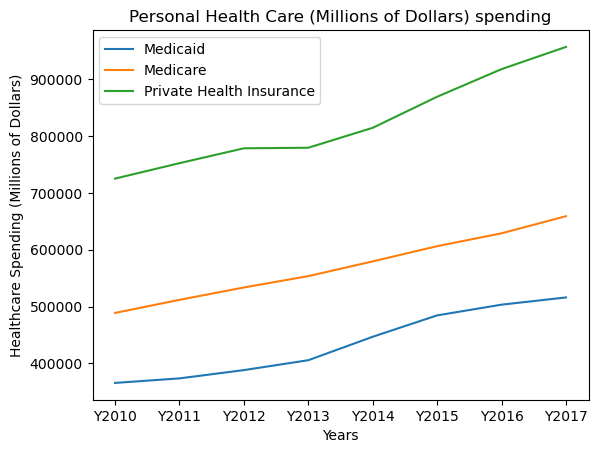

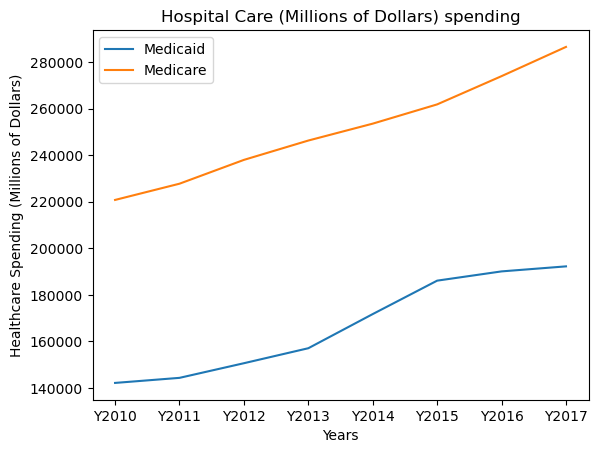

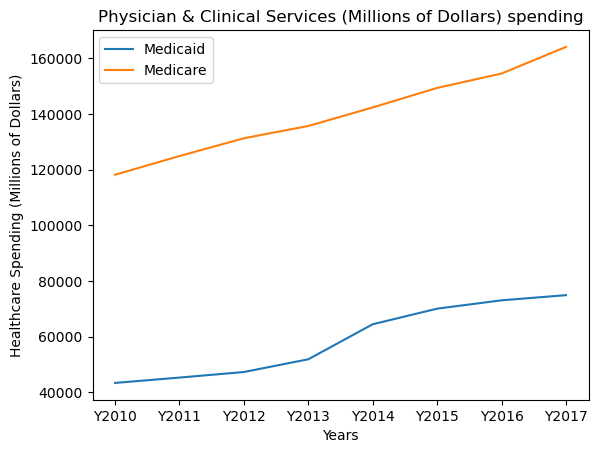

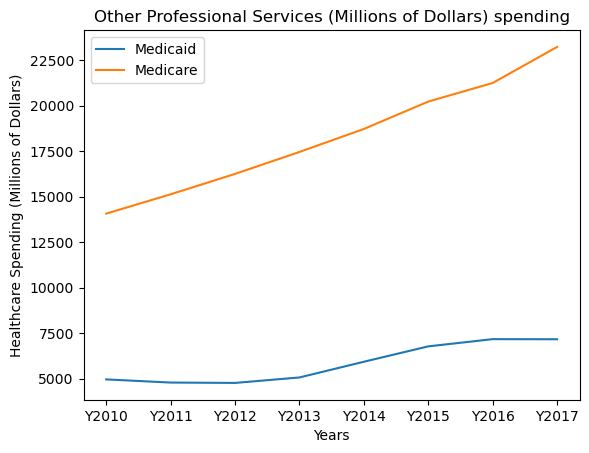

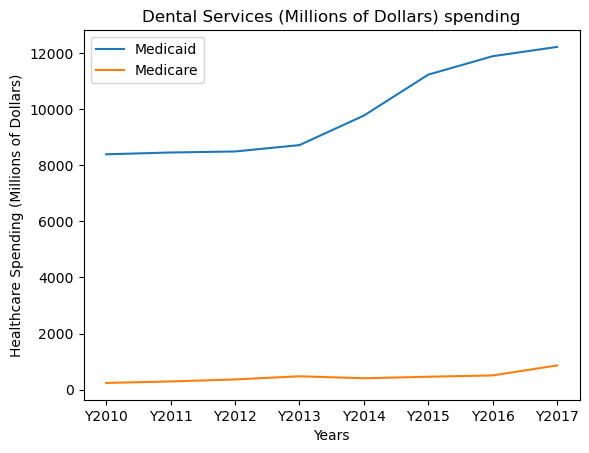

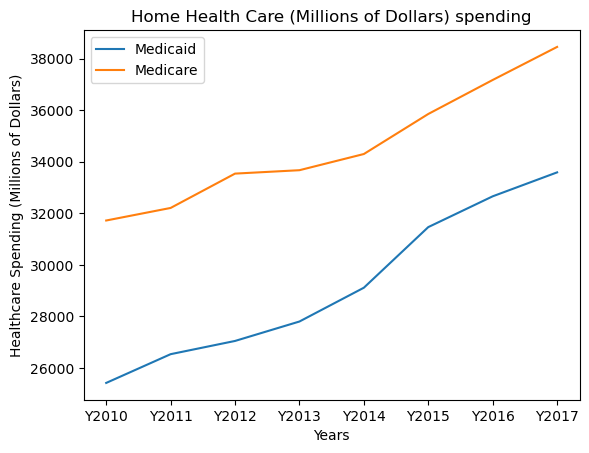

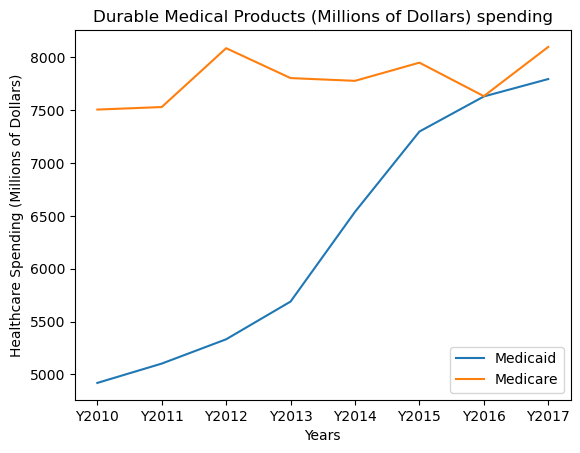

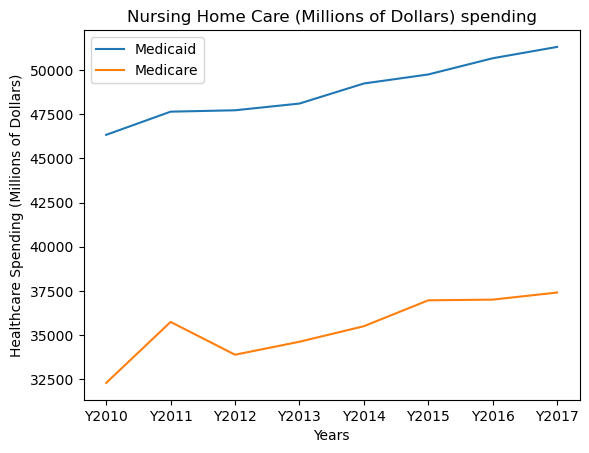

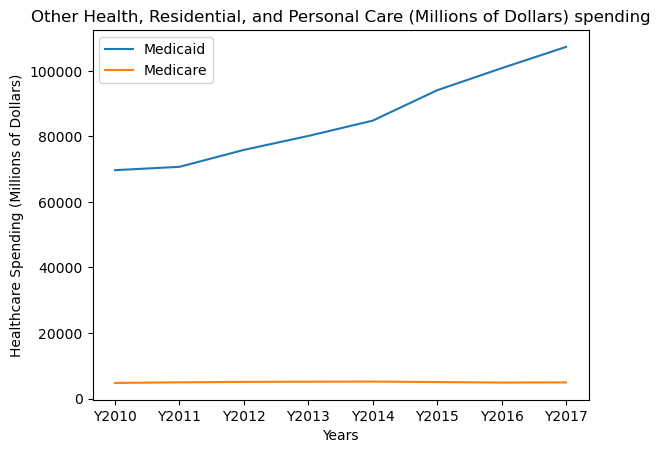

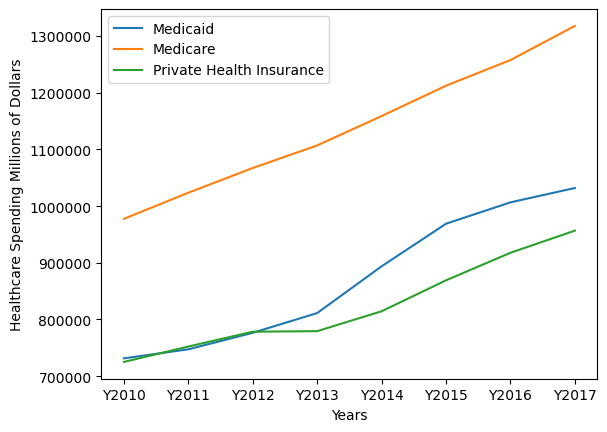

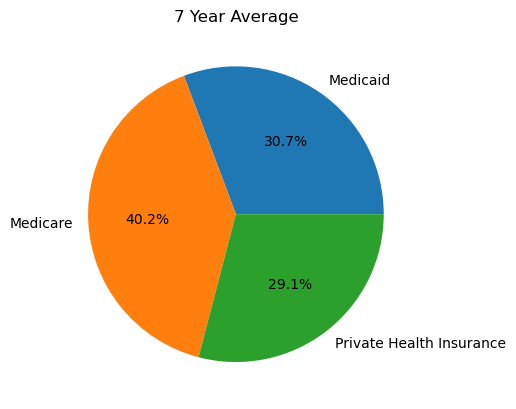

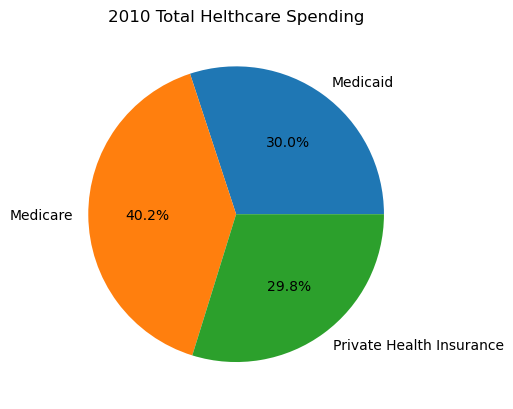

In [ ]:
#loop thorugh the codes and print the spending over the years
for x in range(1,11):
    CodeCaidAgg = TCaidAgg_df.loc[TCaidAgg_df['Code']==x]
    CodeCareAgg = TCareAgg_df.loc[TCareAgg_df['Code']==x]
    CodePHIAgg = TPHIAgg_df.loc[TPHIAgg_df['Code']==x]
    wiam = CodeCareAgg['Item'].unique()
    splittext = wiam[0].split('/')
    whatIamgraphing = splittext[1]
    CodeCaidAgg = CodeCaidAgg.sum()
    CodeCareAgg = CodeCareAgg.sum()
    CodePHIAgg = CodePHIAgg.sum()
    CodeCaidAgg =CodeCaidAgg[["Y"+str(x) for x in range(2010,2018)]]
    CodeCareAgg = CodeCareAgg[["Y"+str(x) for x in range(2010,2018)]]
    CodePHIAgg = CodePHIAgg[["Y"+str(x) for x in range(2010,2018)]]
    CodeCaidAgg.plot(kind = 'line',label = 'Medicaid')
    CodeCareAgg.plot(kind = 'line',label = 'Medicare')
    if(x ==1):
        CodePHIAgg.plot(kind = 'line',label = 'Private Health Insurance')
    plt.xlabel("Years")
    plt.ylabel('Healthcare Spending (Millions of Dollars)')
    plt.legend(loc = 'best')
    plt.title(f"{whatIamgraphing} spending")
    whatIamgraphing = whatIamgraphing.replace(" ", "")
    plt.show()
    plt.savefig(f"Graphs/{whatIamgraphing}Spending")
    plt.clf()

#create sums for the pie graphs
SumCaidAgg = TCaidAgg_df.sum()
SumCareAgg = TCareAgg_df.sum()
SumPHIAgg = TPHIAgg_df.sum()
SumCaidAgg = SumCaidAgg[["Y"+str(x) for x in range(2010,2018)]]
SumCareAgg = SumCareAgg[["Y"+str(x) for x in range(2010,2018)]]
SumPHIAgg = SumPHIAgg[["Y"+str(x) for x in range(2010,2018)]]
Caid10YAvg = round(SumCaidAgg.mean(),2)
Care10YAvg = round(SumCareAgg.mean(),2)
PHI10YAvg = round(SumPHIAgg.mean(),2)
#Graph the 3 different types of insurance payments over time.
SumCaidAgg.plot(kind = 'line',label = 'Medicaid')
SumCareAgg.plot(kind = 'line',label = 'Medicare')
SumPHIAgg.plot(kind = 'line',label = 'Private Health Insurance')
plt.xlabel('Years')
plt.ylabel('Healthcare Spending Millions of Dollars')
plt.ticklabel_format(style='plain',axis='y')
plt.legend(loc = 'best')
plt.savefig(f"Graphs/HealthcareSpendingOverTime")
plt.show()

#Pie graph of 3 10 year Averages
plt.pie([Caid10YAvg,Care10YAvg,PHI10YAvg],labels = ["Medicaid","Medicare","Private Health Insurance"],autopct='%1.1f%%')
plt.title('7 Year Average')
plt.savefig(f"Graphs/10YearSpendingAverage")
plt.show()
plt.pie([SumCaidAgg['Y2010'],SumCareAgg['Y2010'],SumPHIAgg['Y2010']],labels = ["Medicaid","Medicare","Private Health Insurance"],autopct='%1.1f%%')
plt.title('2010 Total Helthcare Spending')
plt.savefig(f"Graphs/2010SpendingPercentage")
plt.show()
plt.pie([SumCaidAgg['Y2017'],SumCareAgg['Y2017'],SumPHIAgg['Y2017']],labels = ["Medicaid","Medicare","Private Health Insurance"],autopct='%1.1f%%')
plt.title('2017 Total Helthcare Spending')
plt.savefig(f"Graphs/2020SpendingPercentage")
plt.show()

# Comparison of number of people enrolled in each

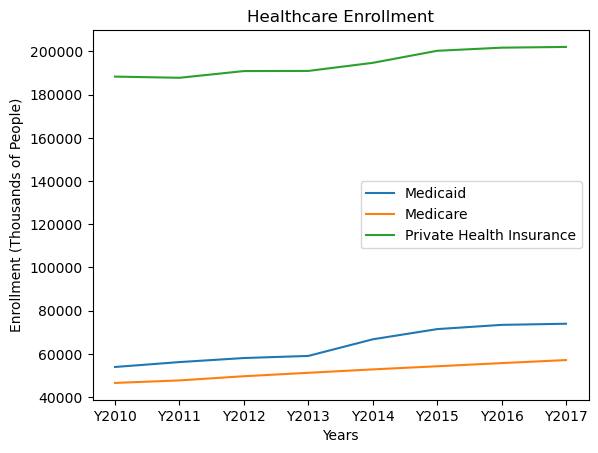

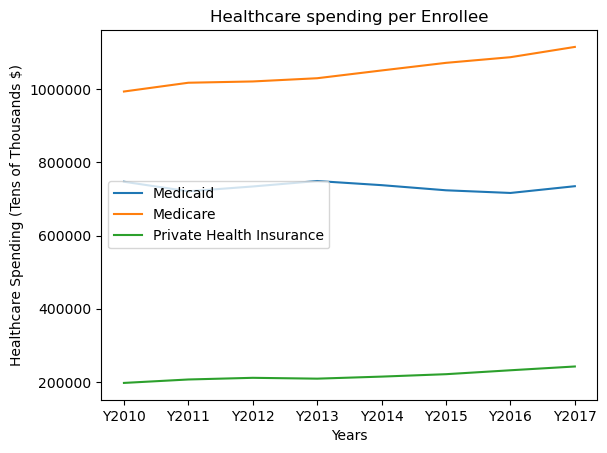

In [ ]:
#import relevant enrollment files
CareEnroll = pd.read_csv("CleanedData/MedicareEnroll.csv")
CaidEnroll = pd.read_csv("CleanedData/MedicadeEnroll.csv")
PHIEnroll = pd.read_csv("CleanedData/PHIEnroll.csv")
CarePerEnroll = pd.read_csv("CleanedData/MedicarePerEnroll.csv")
CaidPerEnroll = pd.read_csv("CleanedData/MedicadePerEnroll.csv")
PHIPerEnroll = pd.read_csv("CleanedData/PHIPerEnroll.csv")




#get total enrollment per year
SumCareEnroll = CareEnroll.sum()
SumCaidEnroll = CaidEnroll.sum()
SumPHIEnroll = PHIEnroll.sum()
SumCarePerEnroll = CarePerEnroll.sum()
SumCaidPerEnroll = CaidPerEnroll.sum()
SumPHIPerEnroll = PHIPerEnroll.sum()
SumCareEnroll = SumCareEnroll[["Y"+str(x) for x in range(2010,2018)]]
SumCaidEnroll =SumCaidEnroll[["Y"+str(x) for x in range(2010,2018)]]
SumPHIEnroll = SumPHIEnroll[["Y"+str(x) for x in range(2010,2018)]]
SumCarePerEnroll = SumCarePerEnroll[["Y"+str(x) for x in range(2010,2018)]]
SumCaidPerEnroll = SumCaidPerEnroll[["Y"+str(x) for x in range(2010,2018)]]
SumPHIPerEnroll = SumPHIPerEnroll[["Y"+str(x) for x in range(2010,2018)]]

#Graph the 3 different types of insurance enrollments over time.
SumCaidEnroll.plot(kind = 'line',label = 'Medicaid')
SumCareEnroll.plot(kind = 'line',label = 'Medicare')
SumPHIEnroll.plot(kind = 'line',label = 'Private Health Insurance')
plt.xlabel('Years')
plt.ylabel('Enrollment (Thousands of People)')
plt.title("Healthcare Enrollment")
plt.legend(loc = 'best')
plt.savefig(f"Graphs/HealthcareEnrollmentOverTime")
plt.show()
#Graph the 3 different types of insurance spending per enrollment over time
SumCaidPerEnroll.plot(kind = 'line',label = 'Medicaid')
SumCarePerEnroll.plot(kind = 'line',label = 'Medicare')
SumPHIPerEnroll.plot(kind = 'line',label = 'Private Health Insurance')
plt.xlabel('Years')
plt.ylabel('Healthcare Spending (Tens of Thousands $)')
plt.ticklabel_format(style='plain',axis='y')
plt.legend(loc = 'best')
plt.title("Healthcare spending per Enrollee")
plt.savefig(f"Graphs/HealthcareSpendingPerEnrolleeOverTime")
plt.show()



# Spending per code per enrollee

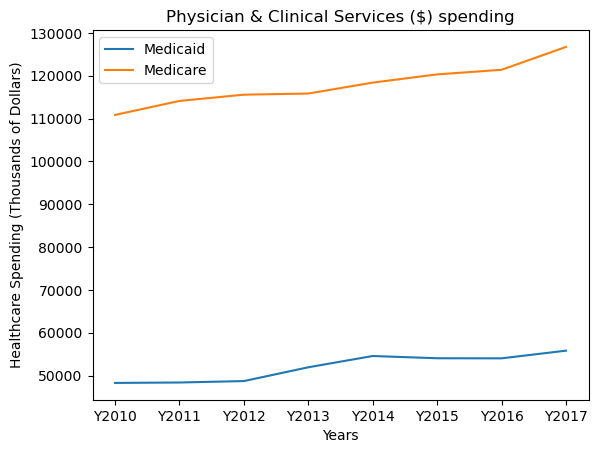

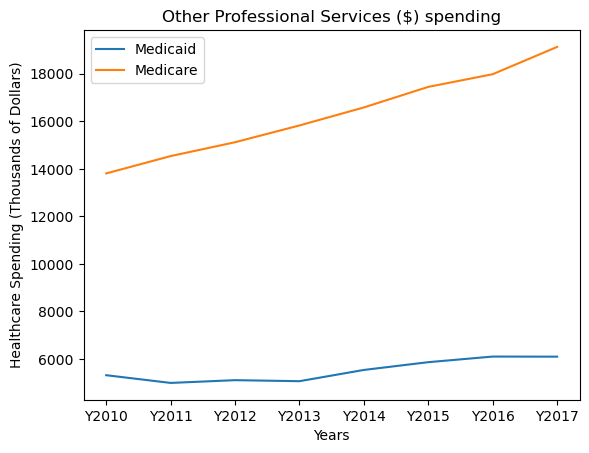

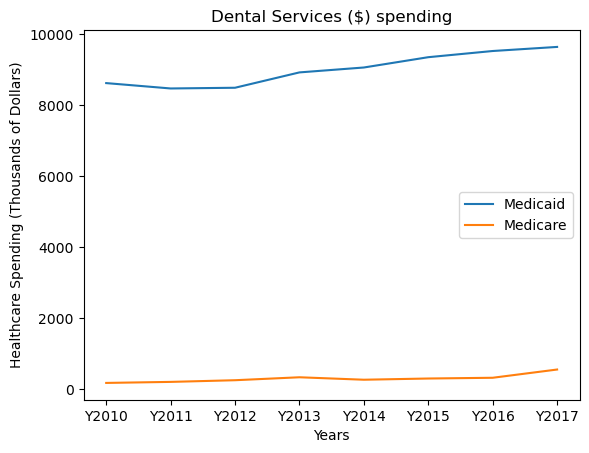

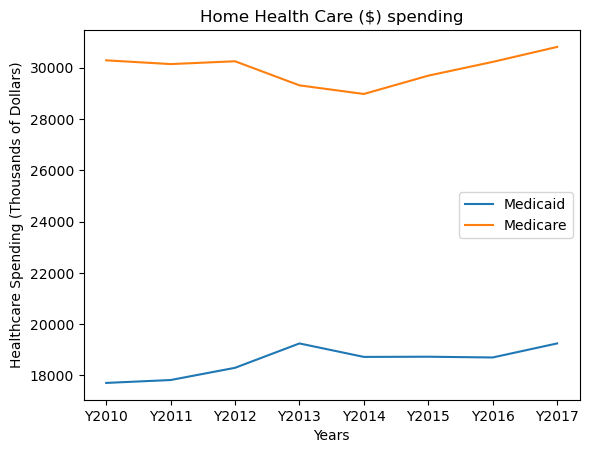

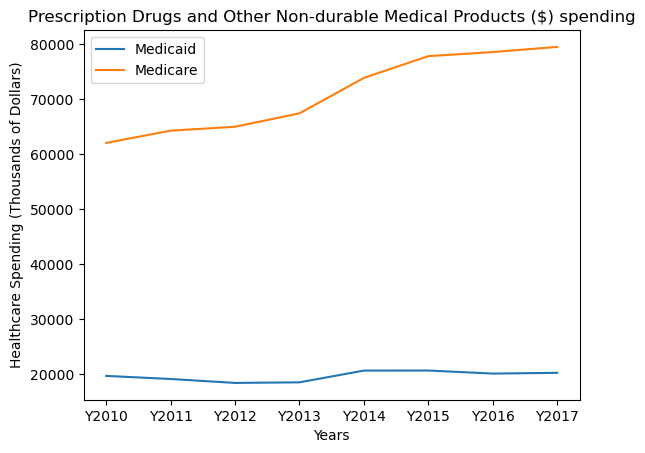

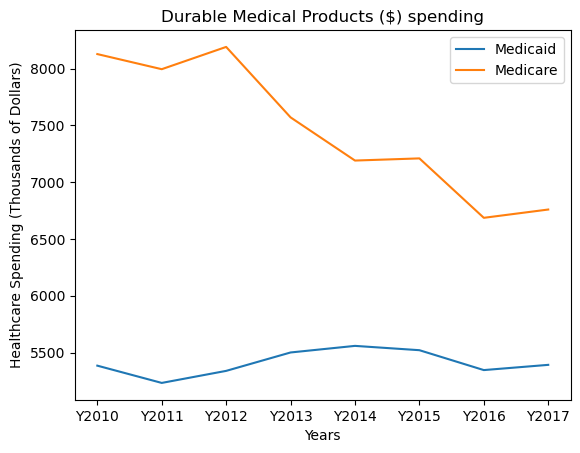

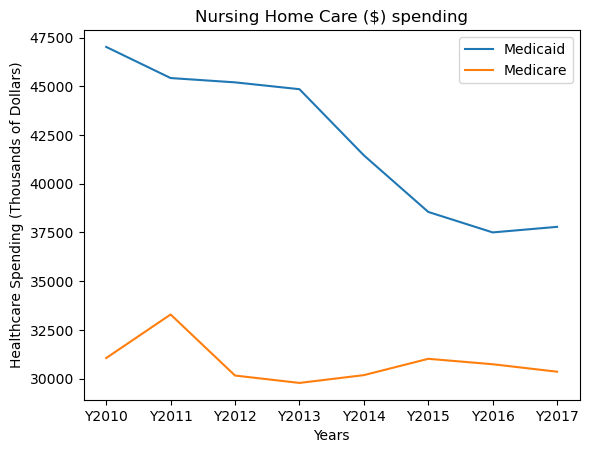

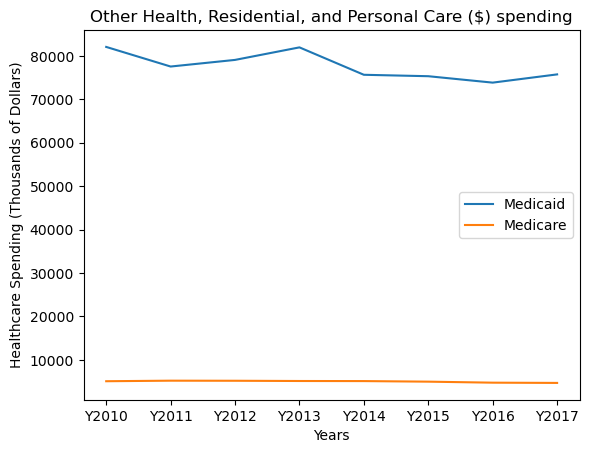

<Figure size 640x480 with 0 Axes>

In [ ]:
#import data
CarePerEnroll = pd.read_csv("CleanedData/MedicarePerEnroll.csv")
CaidPerEnroll = pd.read_csv("CleanedData/MedicadePerEnroll.csv")
PHIPerEnroll = pd.read_csv("CleanedData/PHIPerEnroll.csv")

#loop through the codes
for x in range(1,11):
    CodeCaidAgg = CaidPerEnroll.loc[CaidPerEnroll['Code']==x]
    CodeCareAgg = CarePerEnroll.loc[CarePerEnroll['Code']==x]
    CodePHIAgg = PHIPerEnroll.loc[PHIPerEnroll['Code']==x]
    wiam = CodeCareAgg['Item'].unique()
    splittext = wiam[0].split('/')
    whatIamgraphing = splittext[1]
    CodeCaidAgg = CodeCaidAgg.sum()
    CodeCareAgg = CodeCareAgg.sum()
    CodePHIAgg = CodePHIAgg.sum()
    CodeCaidAgg =CodeCaidAgg[["Y"+str(x) for x in range(2010,2018)]]
    CodeCareAgg = CodeCareAgg[["Y"+str(x) for x in range(2010,2018)]]
    CodePHIAgg = CodePHIAgg[["Y"+str(x) for x in range(2010,2018)]]
    CodeCaidAgg.plot(kind = 'line',label = 'Medicaid')
    CodeCareAgg.plot(kind = 'line',label = 'Medicare')
    if(x ==1):
        CodePHIAgg.plot(kind = 'line',label = 'Private Health Insurance')
    plt.xlabel("Years")
    plt.ylabel('Healthcare Spending (Thousands of Dollars)')
    plt.legend(loc = 'best')
    plt.title(f"{whatIamgraphing} spending")
    whatIamgraphing = whatIamgraphing.replace(" ", "")
    plt.show()
    plt.savefig(f"Graphs/{whatIamgraphing}SpendingPerEnrollee")
    plt.clf()


There is an increase of spending over time however the amount of spending per person has not increased by as much meaning that the increase is more likely related to population than the price of the insurance.

# Linreg and Scatterplot Functions

In [ ]:
#Define LinReg Function that will calculate the Linear Regression of 2 sets of data
#Input: takes 2 data series
#Output: an array of the slope, intercept, rvalue, pvalue,stderr,line to print and line equation
def LinReg(xs,ys):
    slope, intercept, rvalue, pvalue, stderr = linregress(xs,ys)
    regvalues = slope*xs+intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    linregs = [slope,intercept,rvalue,pvalue,stderr,regvalues,line_eq]
    return linregs

In [ ]:
#Define ScatPlotandReg creates a scatter plot with a linear Regression show as well as an Rsquared value
#Inputs: takes 2 data series, your x and y coordinates, labels for  the axises and a title
#Output shows and saves a scatterplot
def ScatPlotandReg(xs,ys,xlab,ylab,title,filename):
    reginfo = LinReg(xs,ys)
    print(f"The r^2-value is: {reginfo[2]**2}")
    plt.scatter(xs,ys)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.plot(xs,reginfo[5],color = 'r')
    plt.annotate(reginfo[6],ha = 'left',va = 'top',fontsize=15,color="red")
    plt.savefig(f"Graphs/{filename}")
    plt.show()

In [ ]:
#Define ScatPlotNoReg creates a scatter plot
#Inputs: takes 2 data series, your x and y coordinates, labels for  the axises and a title
#Output shows and saves a scatterplot
def ScatPlotNoReg(xs,ys,xlab,ylab,title,filename):
    plt.scatter(xs,ys)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.savefig(f"Graphs/{filename}")
    plt.show()

# Comparison of Spending and Mortality Rate

In [ ]:
#change the population data frame into a data frame with columns for state and year for combination
TCareAgg_df = pd.read_csv("CleanedData/USPop.csv")
SumCareAgg10 = TCareAgg_df[["State_Name","Y2010","Code","Item"]]
SumCareAgg10["Year"] = "2010"
SumCareAgg10 = SumCareAgg10.rename(columns={'Y2010':'Population'})
SumCareAgg11 = TCareAgg_df[["State_Name","Y2011","Code","Item"]]
SumCareAgg11["Year"] = "2011"
SumCareAgg11 = SumCareAgg11.rename(columns={'Y2011':'Population'})
SumCareAgg12 = TCareAgg_df[["State_Name","Y2012","Code","Item"]]
SumCareAgg12["Year"] = "2012"
SumCareAgg12 = SumCareAgg12.rename(columns={'Y2012':'Population'})
SumCareAgg13 = TCareAgg_df[["State_Name","Y2013","Code","Item"]]
SumCareAgg13["Year"] = "2013"
SumCareAgg13 = SumCareAgg13.rename(columns={'Y2013':'Population'})
SumCareAgg14 = TCareAgg_df[["State_Name","Y2014","Code","Item"]]
SumCareAgg14["Year"] = "2014"
SumCareAgg14 = SumCareAgg14.rename(columns={'Y2014':'Population'})
SumCareAgg15 = TCareAgg_df[["State_Name","Y2015","Code","Item"]]
SumCareAgg15["Year"] = "2015"
SumCareAgg15 = SumCareAgg15.rename(columns={'Y2015':'Population'})
SumCareAgg16 = TCareAgg_df[["State_Name","Y2016","Code","Item"]]
SumCareAgg16["Year"] = "2016"
SumCareAgg16 = SumCareAgg16.rename(columns={'Y2016':'Population'})
SumCareAgg17 = TCareAgg_df[["State_Name","Y2017","Code","Item"]]
SumCareAgg17["Year"] = "2017"
SumCareAgg17 = SumCareAgg17.rename(columns={'Y2017':'Population'})
NewCareAgg = pd.concat([SumCareAgg10,SumCareAgg11,SumCareAgg12,SumCareAgg13,SumCareAgg14,SumCareAgg15,SumCareAgg16,SumCareAgg17])
NewCareAgg.to_csv("CleanedData/USPopTall.csv")

/var/folders/08/4n5vtwsd5jg4pw1917ng_prc0000gn/T/ipykernel_1110/3994408901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SumCareAgg10["Year"] = "2010"
/var/folders/08/4n5vtwsd5jg4pw1917ng_prc0000gn/T/ipykernel_1110/3994408901.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SumCareAgg11["Year"] = "2011"
/var/folders/08/4n5vtwsd5jg4pw1917ng_prc0000gn/T/ipykernel_1110/3994408901.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [ ]:
#import the neccesary dataframes
Deathdf = pd.read_csv("CensusData/DeathRate.csv")
Spendingdf = pd.read_csv("CleanedData/MedicareAggregateTall.csv")
Popdf = pd.read_csv("CleanedData/USPopTall.csv")


# Comparison of Spending and Mortality Rate

In [ ]:
#Select necessary columns and combine on State (Death and Aggregate)
#print(Popdf)
#Popdf = Popdf[['Year','State','Population']]
#Popdf = Popdf.rename(columns = {'State_Name':'State'})
#merge the required data frames
Mortatlitydf = pd.merge(Deathdf,Popdf,how = 'inner',on=['State','Year'])
Mortatlitydf['Population'] = Mortatlitydf['Population']*1000
Mortatlitydf['Mortality Rate']= round((Mortatlitydf['Deaths']/Mortatlitydf['Population'])*100,2)
Spendingdf = Spendingdf.sort_values(by=['Year','State_Name'])
Mortatlitydf = Mortatlitydf.sort_values(by = ['Year','State'])
Percapspend = pd.merge(Spendingdf,Popdf,how='inner',right_on=['State','Year'],left_on=['State_Name','Year'])
Percapspend["Capita Spending"] = round(Percapspend["Cost"]/Percapspend["Population"]*1000,2)
#sum the dataframes to create the graph
SumSpenddf = Spendingdf.groupby(['Year','State_Name'])
SumSpenddf = SumSpenddf.sum()
Percapspend= Percapspend.groupby(['Year','State'])
Sumcapspend = Percapspend.sum()
Sumcapspend

Unnamed: 0  \
Year State                       
2010 Alabama              2790   
     Alaska               2800   
     Arizona              2810   
     Arkansas             2820   
     California           2830   
...                        ...   
2017 Virginia             3250   
     Washington           3260   
     West Virginia        3270   
     Wisconsin            3280   
     Wyoming              3290   

                                                           State_Name    Cost  \
Year State                                                                      
2010 Alabama        AlabamaAlabamaAlabamaAlabamaAlabamaAlabamaAlab...   16602   
     Alaska         AlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlas...    1125   
     Arizona        ArizonaArizonaArizonaArizonaArizonaArizonaAriz...   17880   
     Arkansas       ArkansasArkansasArkansasArkansasArkansasArkans...    9500   
     California     CaliforniaCaliforniaCaliforniaCaliforniaCalifo...  106014   
...                                                               ...     ...   
2017 Virginia       VirginiaVirginiaVirginiaVirginiaVirginiaVirgin...   29002   
     Washington     WashingtonWashingtonWashingtonWashingtonWashin...   24500   
     West Virginia  West VirginiaWest VirginiaWest VirginiaWest Vi...    9386   
     Wisconsin      WisconsinWisconsinWisconsinWisconsinWisconsinW...   22646   
     Wyoming        WyomingWyomingWyomingWyomingWyomingWyomingWyom...    2007   

                    Code                                               Item  \
Year State                                                                    
2010 Alabama          55  Medicare/Personal Health Care (Millions of Dol...   
     Alaska           55  Medicare/Personal Health Care (Millions of Dol...   
     Arizona          55  Medicare/Personal Health Care (Millions of Dol...   
     Arkansas         55  Medicare/Personal Health Care (Millions of Dol...   
     California       55  Medicare/Personal Health Care (Millions of Dol...   
...                  ...                                                ...   
2017 Virginia         55  Medicare/Personal Health Care (Millions of Dol...   
     Washington       55  Medicare/Personal Health Care (Millions of Dol...   
     West Virginia    55  Medicare/Personal Health Care (Millions of Dol...   
     Wisconsin        55  Medicare/Personal Health Care (Millions of Dol...   
     Wyoming          55  Medicare/Personal Health Care (Millions of Dol...   

                    Population  Capita Spending  
Year State                                       
2010 Alabama             47860          3468.85  
     Alaska               7140          1575.63  
     Arizona             64070          2790.70  
     Arkansas            29220          3251.19  
     California         373200          2840.68  
...                        ...              ...  
2017 Virginia            84710          3423.67  
     Washington          74280          3298.33  
     West Virginia       18190          5159.98  
     Wisconsin           57930          3909.19  
     Wyoming              5800          3460.34  

[408 rows x 7 columns]

The r^2-value is: 0.2672528777574871


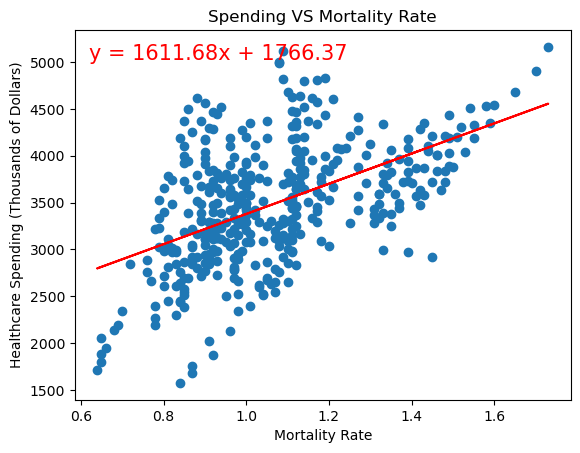

The r^2-value is: 0.008442357931299401


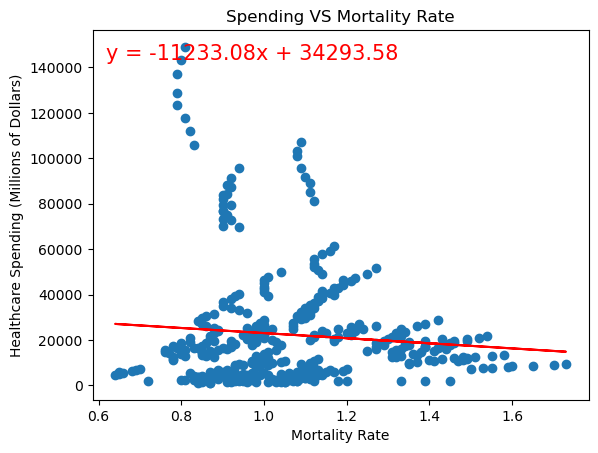

In [ ]:
#create the scatter plot for mortality rate
ScatPlotandReg(Mortatlitydf['Mortality Rate'],Sumcapspend['Capita Spending'],"Mortality Rate","Healthcare Spending (Thousands of Dollars)","Spending VS Mortality Rate","SpendingPerCapVSMortality")
ScatPlotandReg(Mortatlitydf['Mortality Rate'],SumSpenddf['Cost'],"Mortality Rate","Healthcare Spending (Millions of Dollars)","Spending VS Mortality Rate","SpendingVSMortality")

** Analysis of Spending and Mortality Rate ** : There is small positive correlation between per capita state spending and mortality rate

** Analysis of Spending and Mortality Rate ** :

# Comparison of Medicare and Age

In [ ]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
census_data = pd.read_csv("censusData/ageAndSex.csv")
income = pd.read_csv("censusData/income.csv")
medicaid_data = pd.read_csv("cleanedData/medicadeAggregate.csv")
clea_census_data = pd.read_csv("cleanedData/medicarePopulation.csv")
medicare_data = pd.read_csv("cleanedData/medicareEnroll.csv")
# Display sample data
census_data.head(10)

Acsst5Y2010.S0101-Data.1.2    Geography  Geographic Area Name  \
0                        2010  0400000US01               Alabama   
1                        2010  0400000US02                Alaska   
2                        2010  0400000US04               Arizona   
3                        2010  0400000US05              Arkansas   
4                        2010  0400000US06            California   
5                        2010  0400000US08              Colorado   
6                        2010  0400000US09           Connecticut   
7                        2010  0400000US10              Delaware   
8                        2010  0400000US11  District of Columbia   
9                        2010  0400000US12               Florida   

   Total  Estimate  Total Population  Male  Estimate  Total Population  \
0                          4712651.0                         2285905.0   
1                           691189.0                          358919.0   
2                          6246816.0                         3108234.0   
3                          2872684.0                         1408945.0   
4                         36637290.0                        18223157.0   
5                          4887061.0                         2448492.0   
6                          3545837.0                         1724834.0   
7                           881278.0                          427218.0   
8                           584400.0                          276101.0   
9                         18511620.0                         9050155.0   

   Female  Estimate  Total Population  Total  Estimate  Age Under 5 Years  \
0                           2426746.0                                 6.4   
1                            332270.0                                 7.4   
2                           3138582.0                                 7.4   
3                           1463739.0                                 6.8   
4                          18414133.0                                 6.9   
5                           2438569.0                                 7.0   
6                           1821003.0                                 5.8   
7                            454060.0                                 6.4   
8                            308299.0                                 5.5   
9                           9461465.0                                 5.8   

   Male  Estimate  Age Under 5 Years  Female  Estimate  Age Under 5 Years  \
0                                6.7                                  6.1   
1                                7.4                                  7.4   
2                                7.6                                  7.2   
3                                7.1                                  6.5   
4                                7.1                                  6.8   
5                                7.1                                  6.8   
6                                6.1                                  5.5   
7                                6.7                                  6.1   
8                                6.0                                  5.2   
9                                6.1                                  5.6   

   Total  Estimate  Age 5 To 9 Years  ...  \
0                                6.6  ...   
1                                7.2  ...   
2                                7.0  ...   
3                                6.8  ...   
4                                6.8  ...   
5                                6.9  ...   
6                                6.4  ...   
7                                6.4  ...   
8                                4.5  ...   
9                                5.8  ...   

   Female  Estimate  Summary Indicators Age Dependency Ratio Old-Age Dependency Ratio  \
0                                                (X)                                    
1                                                (X)                 

In [ ]:
medicare_data.head(10)

State_Name  Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  \
0               Alabama    845    864    896    922    947    968    988   
1                Alaska     66     69     73     76     80     84     88   
2               Arizona    930    962   1009   1051   1096   1140   1180   
3              Arkansas    531    542    559    572    584    594    607   
4            California   4757   4901   5111   5294   5476   5645   5814   
5              Colorado    625    650    688    722    755    786    816   
6           Connecticut    568    577    595    608    619    630    642   
7              Delaware    149    154    161    168    175    181    187   
8  District of Columbia     78     80     82     84     87     88     90   
9               Florida   3375   3472   3621   3757   3900   4040   4164   

   Y2017  Code                                      Item  
0   1006    11  Medicare Enrollee Population (Thousands)  
1     92    11  Medicare Enrollee Population (Thousands)  
2   1224    11  Medicare Enrollee Population (Thousands)  
3    617    11  Medicare Enrollee Population (Thousands)  
4   5966    11  Medicare Enrollee Population (Thousands)  
5    840    11  Medicare Enrollee Population (Thousands)  
6    654    11  Medicare Enrollee Population (Thousands)  
7    193    11  Medicare Enrollee Population (Thousands)  
8     91    11  Medicare Enrollee Population (Thousands)  
9   4289    11  Medicare Enrollee Population (Thousands)

In [ ]:
medicare_data.columns = medicare_data.columns.str.strip()
medicare_data.rename(columns={
    'State_Name': 'State',
    'Y2010': 'Medicare 2010',
    'Y2011': 'Medicare 2011',
    'Y2012': 'Medicare 2012',
    'Y2013': 'Medicare 2013',
    'Y2014': 'Medicare 2014',
    'Y2015': 'Medicare 2015',
    'Y2016': 'Medicare 2016',
    'Y2017': 'Medicare 2017',


    }, inplace=True)
medicare_data.head(10)

State  Medicare 2010  Medicare 2011  Medicare 2012  \
0               Alabama            845            864            896   
1                Alaska             66             69             73   
2               Arizona            930            962           1009   
3              Arkansas            531            542            559   
4            California           4757           4901           5111   
5              Colorado            625            650            688   
6           Connecticut            568            577            595   
7              Delaware            149            154            161   
8  District of Columbia             78             80             82   
9               Florida           3375           3472           3621   

   Medicare 2013  Medicare 2014  Medicare 2015  Medicare 2016  Medicare 2017  \
0            922            947            968            988           1006   
1             76             80             84             88             92   
2           1051           1096           1140           1180           1224   
3            572            584            594            607            617   
4           5294           5476           5645           5814           5966   
5            722            755            786            816            840   
6            608            619            630            642            654   
7            168            175            181            187            193   
8             84             87             88             90             91   
9           3757           3900           4040           4164           4289   

   Code                                      Item  
0    11  Medicare Enrollee Population (Thousands)  
1    11  Medicare Enrollee Population (Thousands)  
2    11  Medicare Enrollee Population (Thousands)  
3    11  Medicare Enrollee Population (Thousands)  
4    11  Medicare Enrollee Population (Thousands)  
5    11  Medicare Enrollee Population (Thousands)  
6    11  Medicare Enrollee Population (Thousands)  
7    11  Medicare Enrollee Population (Thousands)  
8    11  Medicare Enrollee Population (Thousands)  
9    11  Medicare Enrollee Population (Thousands)

In [ ]:
for col in medicare_data.columns:
    print(col)

State
Medicare 2010
Medicare 2011
Medicare 2012
Medicare 2013
Medicare 2014
Medicare 2015
Medicare 2016
Medicare 2017
Code
Item


In [ ]:
medicare_data.columns = medicare_data.columns.str.replace(' +', ' ', regex=True).str.strip()

# Select the relevant columns
year_medicare_data_2010 = medicare_data[["State", "Medicare 2010"]]
year_medicare_data_2011 = medicare_data[["State", "Medicare 2011"]]
year_medicare_data_2012 = medicare_data[["State", "Medicare 2012"]]
year_medicare_data_2013 = medicare_data[["State", "Medicare 2013"]]
year_medicare_data_2014 = medicare_data[["State", "Medicare 2014"]]
year_medicare_data_2015 = medicare_data[["State", "Medicare 2015"]]
year_medicare_data_2016 = medicare_data[["State", "Medicare 2016"]]
year_medicare_data_2017 = medicare_data[["State", "Medicare 2017"]]

# Show the resulting DataFrame
year_medicare_data_2010.head(10)


State  Medicare 2010
0               Alabama            845
1                Alaska             66
2               Arizona            930
3              Arkansas            531
4            California           4757
5              Colorado            625
6           Connecticut            568
7              Delaware            149
8  District of Columbia             78
9               Florida           3375

In [ ]:
clea_census_data.head()

Unnamed: 0  Acsst5Y2010.S0101-Data.1.2 Geographic Area Name  \
0           0                        2010              Alabama   
1           1                        2010               Alaska   
2           2                        2010              Arizona   
3           3                        2010             Arkansas   
4           4                        2010           California   

   Total  Estimate  Total Population  \
0                          4712651.0   
1                           691189.0   
2                          6246816.0   
3                          2872684.0   
4                         36637290.0   

   Total  Estimate  Selected Age Categories 65 Years And Over  
0                                           636208.0           
1                                            50457.0           
2                                           830827.0           
3                                           405048.0           
4                                          4066739.0

In [ ]:
clea_census_data.columns = clea_census_data.columns.str.strip()
clea_census_data.rename(columns={
    'Acsst5Y2010.S0101-Data.1.2': 'Year',
    'Geographic Area Name': 'State',
    'Total Estimate Total Population': 'Total Population',
    'Total Estimate Selected Age Categories 65 Years And Over': 'Age Categories 65 Years and older'
    }, inplace=True)
clea_census_data

Unnamed: 0  Year          State  Total  Estimate  Total Population  \
0             0  2010        Alabama                          4712651.0   
1             1  2010         Alaska                           691189.0   
2             2  2010        Arizona                          6246816.0   
3             3  2010       Arkansas                          2872684.0   
4             4  2010     California                         36637290.0   
..          ...   ...            ...                                ...   
407         414  2017       Virginia                          8365952.0   
408         415  2017     Washington                          7169967.0   
409         416  2017  West Virginia                          1836843.0   
410         417  2017      Wisconsin                          5763217.0   
411         418  2017        Wyoming                           583200.0   

     Total  Estimate  Selected Age Categories 65 Years And Over  
0                                             636208.0           
1                                              50457.0           
2                                             830827.0           
3                                             405048.0           
4                                            4066739.0           
..                                                 ...           
407                                           303515.0           
408                                           253125.0           
409                                            61792.0           
410                                           205743.0           
411                                            22300.0           

[412 rows x 5 columns]

In [ ]:
for col in clea_census_data.columns:
    print(col)

Unnamed: 0
Year
State
Total  Estimate  Total Population
Total  Estimate  Selected Age Categories 65 Years And Over


In [ ]:
# Remove the extra space from "Re-infested  Dwelling Unit Count" column
clea_census_data = clea_census_data.rename(
    columns={"Total  Estimate  Total Population": "Total Population", "Total  Estimate  Selected Age Categories 65 Years And Over": "Age Categories 65 Years And Over"})
#cleanup the spaces
clea_census_data.columns = clea_census_data.columns.str.replace(' +', ' ', regex=True).str.strip()


In [ ]:
print(clea_census_data.columns)

# Clean up extra spaces in column names
clea_census_data.columns = clea_census_data.columns.str.replace(' +', ' ', regex=True).str.strip()

# Select the relevant columns
new_census_data = clea_census_data[["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]

# Show the resulting DataFrame
new_census_data

Index(['Unnamed: 0', 'Year', 'State', 'Total Population',
       'Age Categories 65 Years And Over'],
      dtype='object')


Year          State  Total Population  Age Categories 65 Years And Over
0    2010        Alabama         4712651.0                          636208.0
1    2010         Alaska          691189.0                           50457.0
2    2010        Arizona         6246816.0                          830827.0
3    2010       Arkansas         2872684.0                          405048.0
4    2010     California        36637290.0                         4066739.0
..    ...            ...               ...                               ...
407  2017       Virginia         8365952.0                          303515.0
408  2017     Washington         7169967.0                          253125.0
409  2017  West Virginia         1836843.0                           61792.0
410  2017      Wisconsin         5763217.0                          205743.0
411  2017        Wyoming          583200.0                           22300.0

[412 rows x 4 columns]

In [ ]:
selected_states = new_census_data.iloc[1:10]  # Adjust the range as needed
selected_states
#states_to_select = new_census_data[["State"]]
#states_to_select


Year                 State  Total Population  \
1  2010                Alaska          691189.0   
2  2010               Arizona         6246816.0   
3  2010              Arkansas         2872684.0   
4  2010            California        36637290.0   
5  2010              Colorado         4887061.0   
6  2010           Connecticut         3545837.0   
7  2010              Delaware          881278.0   
8  2010  District of Columbia          584400.0   
9  2010               Florida        18511620.0   

   Age Categories 65 Years And Over  
1                           50457.0  
2                          830827.0  
3                          405048.0  
4                         4066739.0  
5                          513141.0  
6                          492871.0  
7                          122498.0  
8                           67206.0  
9                         3128464.0

In [ ]:
count_states = pd.DataFrame(new_census_data)# YOUR CODE HERE

# Show Record Count
count_states.count()

Year                                412
State                               412
Total Population                    408
Age Categories 65 Years And Over    408
dtype: int64

In [ ]:
for col in new_census_data.columns:
    print(col)

Year
State
Total Population
Age Categories 65 Years And Over


In [ ]:
new_census_data = new_census_data.dropna()
new_census_data.count()

Year                                408
State                               408
Total Population                    408
Age Categories 65 Years And Over    408
dtype: int64

In [ ]:
#select data per year
Year_census_data_2010 = new_census_data.loc[new_census_data["Year"] == 2010, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2011 = new_census_data.loc[new_census_data["Year"] == 2011, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2012 = new_census_data.loc[new_census_data["Year"] == 2012, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2013 = new_census_data.loc[new_census_data["Year"] == 2013, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2014 = new_census_data.loc[new_census_data["Year"] == 2014, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2015 = new_census_data.loc[new_census_data["Year"] == 2015, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2016 = new_census_data.loc[new_census_data["Year"] == 2016, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2017 = new_census_data.loc[new_census_data["Year"] == 2017, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]

# Display the filtered DataFrame
Year_census_data_2010.head(5)


Year       State  Total Population  Age Categories 65 Years And Over
0  2010     Alabama         4712651.0                          636208.0
1  2010      Alaska          691189.0                           50457.0
2  2010     Arizona         6246816.0                          830827.0
3  2010    Arkansas         2872684.0                          405048.0
4  2010  California        36637290.0                         4066739.0

In [ ]:
Year_census_data_2010_count = Year_census_data_2010['State'].count()
Year_census_data_2011_count = Year_census_data_2011['State'].count()
Year_census_data_2012_count = Year_census_data_2012['State'].count()
Year_census_data_2013_count = Year_census_data_2013['State'].count()
Year_census_data_2014_count = Year_census_data_2014['State'].count()
Year_census_data_2015_count = Year_census_data_2015['State'].count()
Year_census_data_2016_count = Year_census_data_2016['State'].count()
Year_census_data_2017_count = Year_census_data_2017['State'].count()
#Initiate a directory
state_total_counts = {}
for year in range(2010, 2018):
    year_data = eval(f'Year_census_data_{year}')  # Get the DataFrame for the year
    for state in year_data['State']:
        if state in state_total_counts:
            state_total_counts[state] += 1  # Increment count for existing state
        else:
            state_total_counts[state] = 1  # Initialize count for new state

# Display the total counts for each state
for state, count in state_total_counts.items():
    print(f"Total count for {state}: {count}")


Total count for Alabama: 8
Total count for Alaska: 8
Total count for Arizona: 8
Total count for Arkansas: 8
Total count for California: 8
Total count for Colorado: 8
Total count for Connecticut: 8
Total count for Delaware: 8
Total count for District of Columbia: 8
Total count for Florida: 8
Total count for Georgia: 8
Total count for Hawaii: 8
Total count for Idaho: 8
Total count for Illinois: 8
Total count for Indiana: 8
Total count for Iowa: 8
Total count for Kansas: 8
Total count for Kentucky: 8
Total count for Louisiana: 8
Total count for Maine: 8
Total count for Maryland: 8
Total count for Massachusetts: 8
Total count for Michigan: 8
Total count for Minnesota: 8
Total count for Mississippi: 8
Total count for Missouri: 8
Total count for Montana: 8
Total count for Nebraska: 8
Total count for Nevada: 8
Total count for New Hampshire: 8
Total count for New Jersey: 8
Total count for New Mexico: 8
Total count for New York: 8
Total count for North Carolina: 8
Total count for North Dakota: 

In [ ]:
yearly_counts = {}

# Loop through each year from 2010 to 2017
for year in range(2010, 2018):
    # Filter the data for the current year
    year_data = new_census_data.loc[new_census_data["Year"] == year]
    
    # Count the number of rows (states) for the current year
    year_count = year_data['State'].count()
    
    # Store the count in the dictionary with the year as the key
    yearly_counts[year] = year_count

# Print the yearly counts
for year, count in yearly_counts.items():
    print(f"Year {year}: {count} states")

# If you want to convert this into a DataFrame for further analysis:
yearly_counts_df = pd.DataFrame(list(yearly_counts.items()), columns=['Year', 'Total States'])
yearly_counts_df

Year 2010: 51 states
Year 2011: 51 states
Year 2012: 51 states
Year 2013: 51 states
Year 2014: 51 states
Year 2015: 51 states
Year 2016: 51 states
Year 2017: 51 states


Year  Total States
0  2010            51
1  2011            51
2  2012            51
3  2013            51
4  2014            51
5  2015            51
6  2016            51
7  2017            51

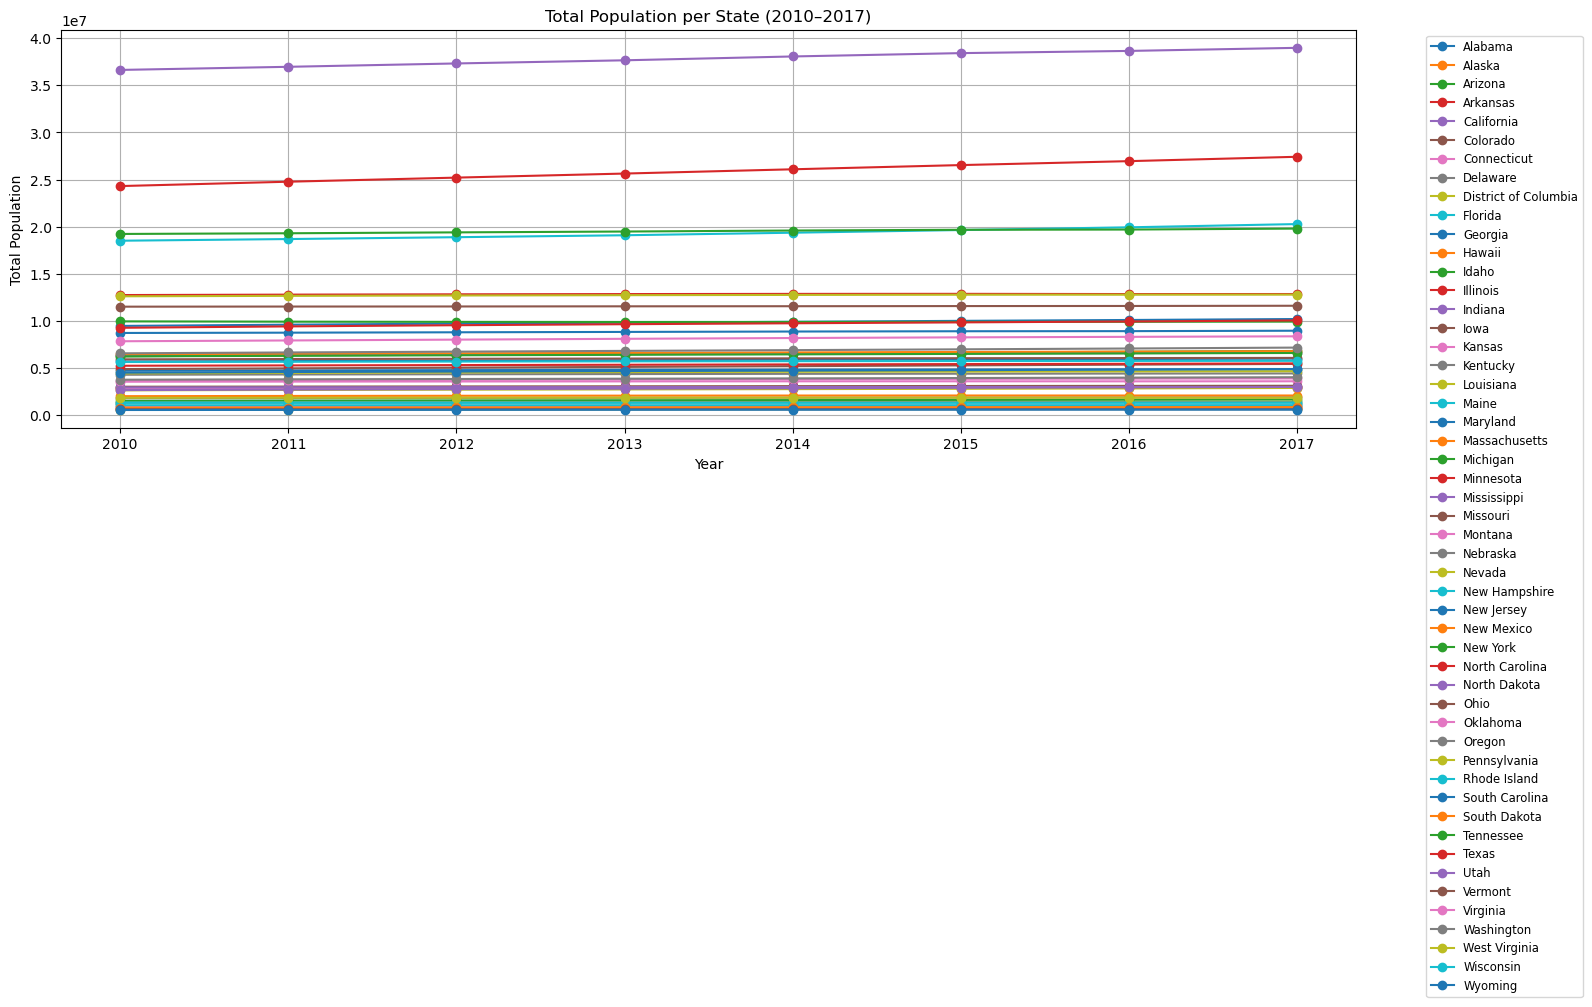

In [ ]:
# Filter data for the years 2010 to 2017
filtered_data = new_census_data[(new_census_data['Year'] >= 2010) & (new_census_data['Year'] <= 2017)]

# Group data by State and Year, then sum the total population for each state per year (if multiple records exist)
grouped_data = filtered_data.groupby(['Year', 'State'])['Total Population'].sum().unstack()

# Create a line plot for each state across the years 2010 to 2017
plt.figure(figsize=(16, 8))

# Plot for each state
for state in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[state], label=state, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population per State (2010–2017)')
plt.xticks(grouped_data.index)  # Ensure years are displayed correctly on the x-axis
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Move legend outside of the graph
plt.grid(True)

# Adjust layout for readability
plt.tight_layout()

# Show the plot
plt.show()

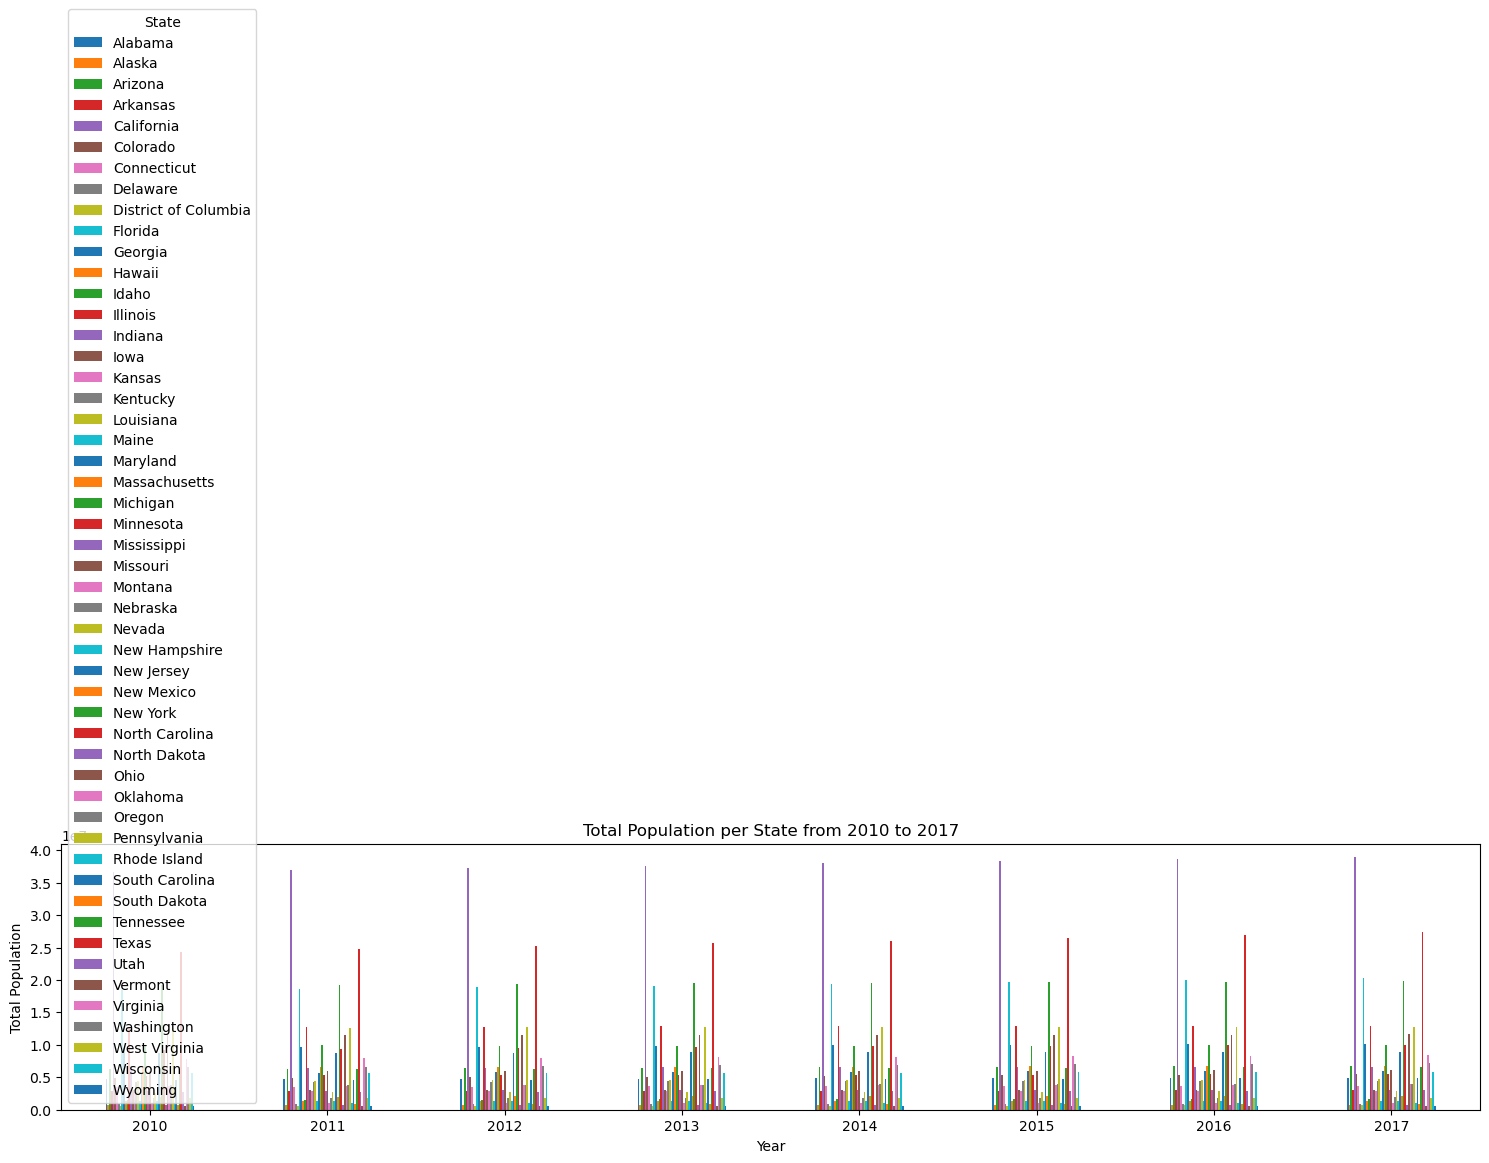

In [ ]:
grouped_data = new_census_data.groupby(['Year', 'State'])['Total Population'].sum().reset_index()

# Pivot the data so that states are columns and years are rows
pivot_data = grouped_data.pivot(index='Year', columns='State', values='Total Population')

# Create a bar chart for total population per state over the years
pivot_data.plot(kind='bar', stacked=False, figsize=(15, 8))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population per State from 2010 to 2017')

# Optional: Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()  # Adjusts layout to fit everything nicely
plt.show()

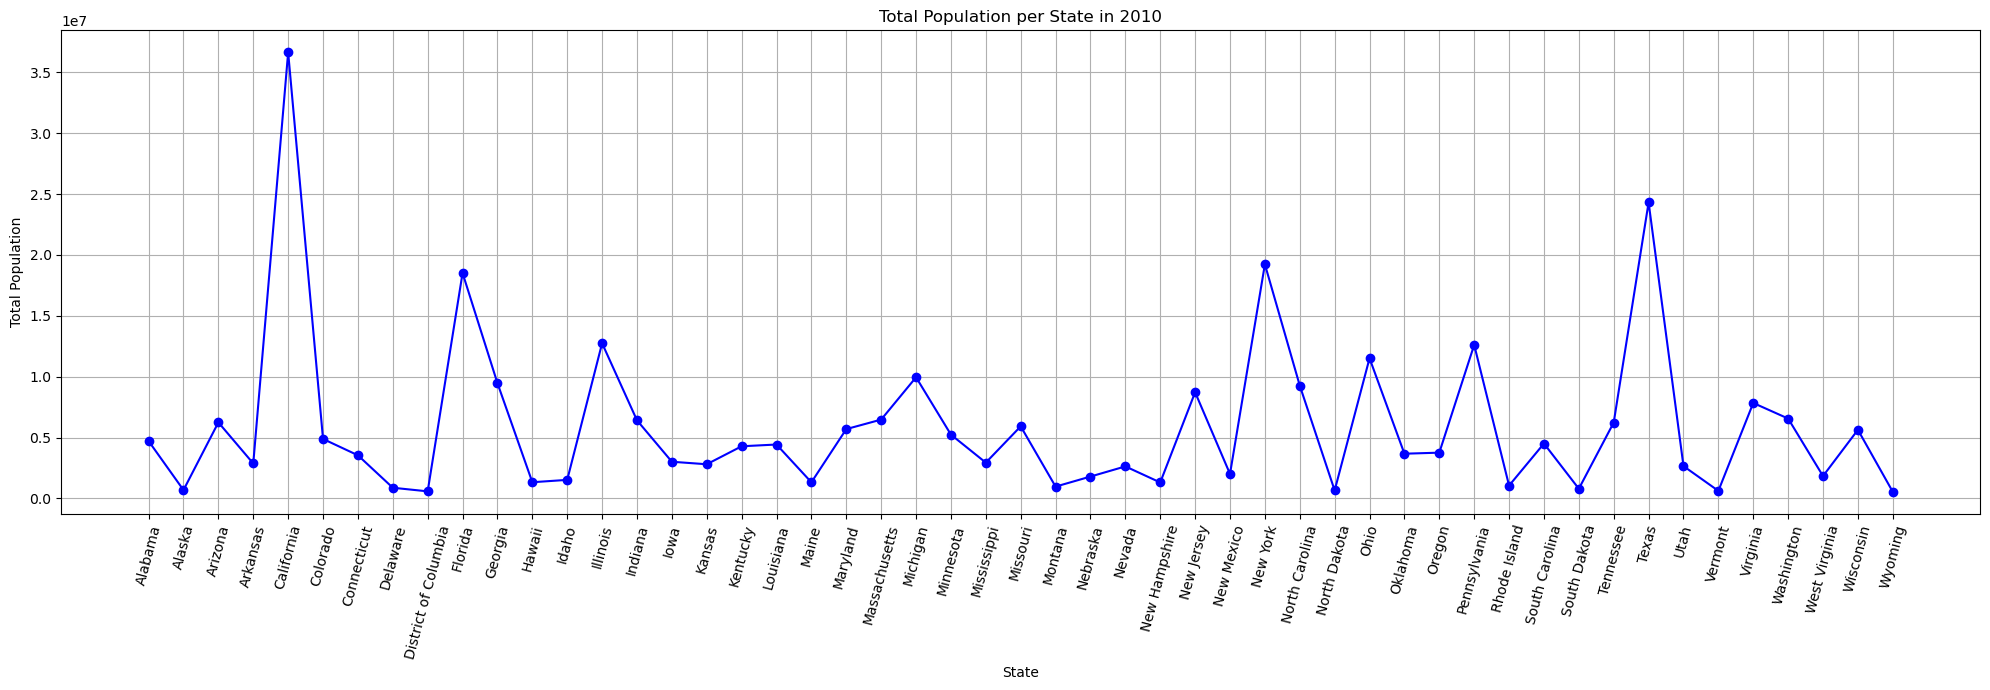

In [ ]:
Year_census_data_2010 = pd.DataFrame(Year_census_data_2010)

# Create a line graph for total population per state in 2010
plt.figure(figsize=(20, 7))  # Optional: Adjust figure size

# Plotting the line graph
plt.plot(Year_census_data_2010['State'], Year_census_data_2010['Total Population'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Total Population')
plt.title('Total Population per State in 2010')

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjusts layout to make room for the x-axis labels
plt.show()

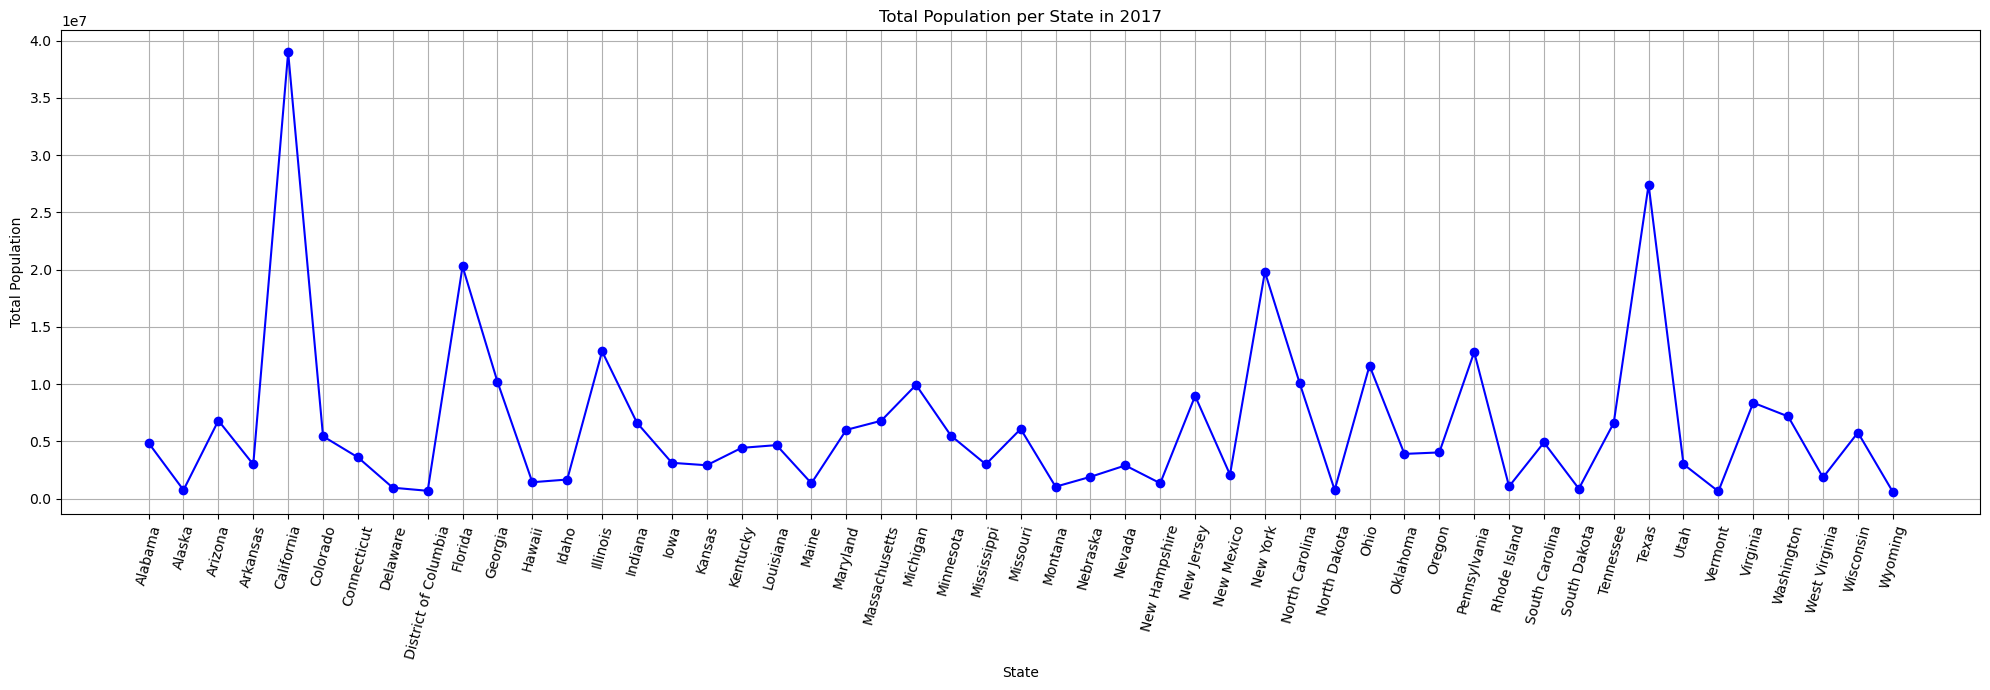

In [ ]:
Year_census_data_2017 = pd.DataFrame(Year_census_data_2017)

# Create a line graph for total population per state in 2017
plt.figure(figsize=(20, 7))  # Optional: Adjust figure size

# Plotting the line graph
plt.plot(Year_census_data_2017['State'], Year_census_data_2017['Total Population'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Total Population')
plt.title('Total Population per State in 2017')

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjusts layout to make room for the x-axis labels
plt.show()

In [ ]:
top_10_states = Year_census_data_2010.nlargest(10, 'Total Population')['State'].tolist()

# Step 2: Filter the 2017 data to include only those states
filtered_data_2010 = Year_census_data_2010[Year_census_data_2010['State'].isin(top_10_states)]
filtered_data_2011 = Year_census_data_2011[Year_census_data_2011['State'].isin(top_10_states)]
filtered_data_2012 = Year_census_data_2012[Year_census_data_2012['State'].isin(top_10_states)]
filtered_data_2013 = Year_census_data_2013[Year_census_data_2013['State'].isin(top_10_states)]
filtered_data_2014 = Year_census_data_2014[Year_census_data_2014['State'].isin(top_10_states)]
filtered_data_2015 = Year_census_data_2015[Year_census_data_2015['State'].isin(top_10_states)]
filtered_data_2016 = Year_census_data_2016[Year_census_data_2016['State'].isin(top_10_states)]
filtered_data_2017 = Year_census_data_2017[Year_census_data_2017['State'].isin(top_10_states)]

filtered_data_2017

Year           State  Total Population  Age Categories 65 Years And Over
365  2017      California        38982847.0                         1480311.0
370  2017         Florida        20278447.0                          663014.0
371  2017         Georgia        10201635.0                          368719.0
374  2017        Illinois        12854526.0                          452122.0
383  2017        Michigan         9925568.0                          369574.0
393  2017        New York        19798228.0                          707740.0
394  2017  North Carolina        10052564.0                          367552.0
396  2017            Ohio        11609756.0                          397736.0
399  2017    Pennsylvania        12790505.0                          436679.0
404  2017           Texas        27419612.0                         1024950.0

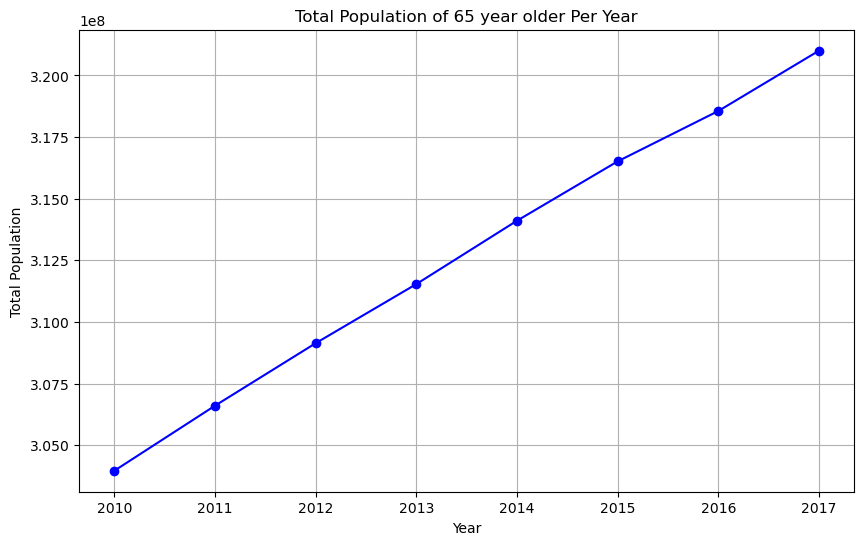

In [ ]:
# Grouping data by year and summing the total population for each year
population_per_year = new_census_data.groupby("Year")["Total Population"].sum()

# Create the line plot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.plot(population_per_year.index, population_per_year.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population of 65 year older Per Year')

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# print columnds 
new_census_data.columns


Index(['Year', 'State', 'Total Population',
       'Age Categories 65 Years And Over'],
      dtype='object')

In [ ]:
medicare_data.columns

Index(['State', 'Medicare 2010', 'Medicare 2011', 'Medicare 2012',
       'Medicare 2013', 'Medicare 2014', 'Medicare 2015', 'Medicare 2016',
       'Medicare 2017', 'Code', 'Item'],
      dtype='object')

In [ ]:
new_census_data.columns = new_census_data.columns.str.strip()
medicare_data.columns = medicare_data.columns.str.strip()

In [ ]:
print('Year' in new_census_data.columns)
print('State' in new_census_data.columns)
print('Year' in medicare_data.columns)
print('State' in medicare_data.columns)

True
True
False
True


In [ ]:
merged_data = pd.merge(new_census_data, medicare_data, on=['State'], how='inner')  # 'inner' will keep common rows
merged_data

Year          State  Total Population  Age Categories 65 Years And Over  \
0    2010        Alabama         4712651.0                          636208.0   
1    2010         Alaska          691189.0                           50457.0   
2    2010        Arizona         6246816.0                          830827.0   
3    2010       Arkansas         2872684.0                          405048.0   
4    2010     California        36637290.0                         4066739.0   
..    ...            ...               ...                               ...   
403  2017       Virginia         8365952.0                          303515.0   
404  2017     Washington         7169967.0                          253125.0   
405  2017  West Virginia         1836843.0                           61792.0   
406  2017      Wisconsin         5763217.0                          205743.0   
407  2017        Wyoming          583200.0                           22300.0   

     Medicare 2010  Medicare 2011  Medicare 2012  Medicare 2013  \
0              845            864            896            922   
1               66             69             73             76   
2              930            962           1009           1051   
3              531            542            559            572   
4             4757           4901           5111           5294   
..             ...            ...            ...            ...   
403           1141           1173           1227           1269   
404            972           1005           1056           1100   
405            382            386            397            404   
406            911            931            966            994   
407             80             82             86             89   

     Medicare 2014  Medicare 2015  Medicare 2016  Medicare 2017  Code  \
0              947            968            988           1006    11   
1               80             84             88             92    11   
2             1096           1140           1180           1224    11   
3              584            594            607            617    11   
4             5476           5645           5814           5966    11   
..             ...            ...            ...            ...   ...   
403           1311           1349           1389           1427    11   
404           1146           1192           1235           1275    11   
405            411            416            422            427    11   
406           1023           1050           1080           1110    11   
407             92             95             98            102    11   

                                         Item  
0    Medicare Enrollee Population (Thousands)  
1    Medicare Enrollee Population (Thousands)  
2    Medicare Enrollee Population (Thousands)  
3    Medicare Enrollee Population (Thousands)  
4    Medicare Enrollee Population (Thousands)  
..                                        ...  
403  Medicare Enrollee Population (Thousands)  
404  Medicare Enrollee Population (Thousands)  
405  Medicare Enrollee Population (Thousands)  
406  Medicare Enrollee Population (Thousands)  
407  Medicare Enrollee Population (Thousands)  

[408 rows x 14 columns]

In [ ]:
merged_data = merged_data.dropna()
merged_data.count()

for col in merged_data.columns:
    print(col)

Year
State
Total Population
Age Categories 65 Years And Over
Medicare 2010
Medicare 2011
Medicare 2012
Medicare 2013
Medicare 2014
Medicare 2015
Medicare 2016
Medicare 2017
Code
Item


In [ ]:
new_merged_data = merged_data[["Year", "State", "Total Population", "Age Categories 65 Years And Over", "Medicare 2010", "Medicare 2011", "Medicare 2012", "Medicare 2013", "Medicare 2014", "Medicare 2015", "Medicare 2016", "Medicare 2017", "Item"]]
new_merged_data

Year          State  Total Population  Age Categories 65 Years And Over  \
0    2010        Alabama         4712651.0                          636208.0   
1    2010         Alaska          691189.0                           50457.0   
2    2010        Arizona         6246816.0                          830827.0   
3    2010       Arkansas         2872684.0                          405048.0   
4    2010     California        36637290.0                         4066739.0   
..    ...            ...               ...                               ...   
403  2017       Virginia         8365952.0                          303515.0   
404  2017     Washington         7169967.0                          253125.0   
405  2017  West Virginia         1836843.0                           61792.0   
406  2017      Wisconsin         5763217.0                          205743.0   
407  2017        Wyoming          583200.0                           22300.0   

     Medicare 2010  Medicare 2011  Medicare 2012  Medicare 2013  \
0              845            864            896            922   
1               66             69             73             76   
2              930            962           1009           1051   
3              531            542            559            572   
4             4757           4901           5111           5294   
..             ...            ...            ...            ...   
403           1141           1173           1227           1269   
404            972           1005           1056           1100   
405            382            386            397            404   
406            911            931            966            994   
407             80             82             86             89   

     Medicare 2014  Medicare 2015  Medicare 2016  Medicare 2017  \
0              947            968            988           1006   
1               80             84             88             92   
2             1096           1140           1180           1224   
3              584            594            607            617   
4             5476           5645           5814           5966   
..             ...            ...            ...            ...   
403           1311           1349           1389           1427   
404           1146           1192           1235           1275   
405            411            416            422            427   
406           1023           1050           1080           1110   
407             92             95             98            102   

                                         Item  
0    Medicare Enrollee Population (Thousands)  
1    Medicare Enrollee Population (Thousands)  
2    Medicare Enrollee Population (Thousands)  
3    Medicare Enrollee Population (Thousands)  
4    Medicare Enrollee Population (Thousands)  
..                                        ...  
403  Medicare Enrollee Population (Thousands)  
404  Medicare Enrollee Population (Thousands)  
405  Medicare Enrollee Population (Thousands)  
406  Medicare Enrollee Population (Thousands)  
407  Medicare Enrollee Population (Thousands)  

[408 rows x 13 columns]

In [ ]:
# Select the top 10 states by Total Population
top_10_states = new_merged_data.nlargest(10, 'Total Population')

# Display the top 10 states
print(top_10_states[['State', 'Total Population']])

          State  Total Population
361  California        38982847.0
310  California        38654206.0
259  California        38421464.0
208  California        38066920.0
157  California        37659181.0
106  California        37325068.0
55   California        36969200.0
4    California        36637290.0
400       Texas        27419612.0
349       Texas        26956435.0


In [ ]:
organized_df = new_merged_data.sort_values(by=['Item', 'State','Year'])

# Display the organized DataFrame
organized_df

Year    State  Total Population  Age Categories 65 Years And Over  \
0    2010  Alabama         4712651.0                          636208.0   
51   2011  Alabama         4747424.0                          645650.0   
102  2012  Alabama         4777326.0                          664048.0   
153  2013  Alabama         4799277.0                          681497.0   
204  2014  Alabama         4817678.0                          698563.0   
..    ...      ...               ...                               ...   
203  2013  Wyoming          570134.0                           72407.0   
254  2014  Wyoming          575251.0                           75358.0   
305  2015  Wyoming          579679.0                           78257.0   
356  2016  Wyoming          583029.0                           80458.0   
407  2017  Wyoming          583200.0                           22300.0   

     Medicare 2010  Medicare 2011  Medicare 2012  Medicare 2013  \
0              845            864            896            922   
51             845            864            896            922   
102            845            864            896            922   
153            845            864            896            922   
204            845            864            896            922   
..             ...            ...            ...            ...   
203             80             82             86             89   
254             80             82             86             89   
305             80             82             86             89   
356             80             82             86             89   
407             80             82             86             89   

     Medicare 2014  Medicare 2015  Medicare 2016  Medicare 2017  \
0              947            968            988           1006   
51             947            968            988           1006   
102            947            968            988           1006   
153            947            968            988           1006   
204            947            968            988           1006   
..             ...            ...            ...            ...   
203             92             95             98            102   
254             92             95             98            102   
305             92             95             98            102   
356             92             95             98            102   
407             92             95             98            102   

                                         Item  
0    Medicare Enrollee Population (Thousands)  
51   Medicare Enrollee Population (Thousands)  
102  Medicare Enrollee Population (Thousands)  
153  Medicare Enrollee Population (Thousands)  
204  Medicare Enrollee Population (Thousands)  
..                                        ...  
203  Medicare Enrollee Population (Thousands)  
254  Medicare Enrollee Population (Thousands)  
305  Medicare Enrollee Population (Thousands)  
356  Medicare Enrollee Population (Thousands)  
407  Medicare Enrollee Population (Thousands)  

[408 rows x 13 columns]

In [ ]:

# Sorting the DataFrame and resetting the index
sorted_data = new_merged_data.sort_values(by=['Item', 'Year', 'State']).reset_index(drop=True)

# Display the sorted and reindexed DataFrame
sorted_data

Year          State  Total Population  Age Categories 65 Years And Over  \
0    2010        Alabama         4712651.0                          636208.0   
1    2010         Alaska          691189.0                           50457.0   
2    2010        Arizona         6246816.0                          830827.0   
3    2010       Arkansas         2872684.0                          405048.0   
4    2010     California        36637290.0                         4066739.0   
..    ...            ...               ...                               ...   
403  2017       Virginia         8365952.0                          303515.0   
404  2017     Washington         7169967.0                          253125.0   
405  2017  West Virginia         1836843.0                           61792.0   
406  2017      Wisconsin         5763217.0                          205743.0   
407  2017        Wyoming          583200.0                           22300.0   

     Medicare 2010  Medicare 2011  Medicare 2012  Medicare 2013  \
0              845            864            896            922   
1               66             69             73             76   
2              930            962           1009           1051   
3              531            542            559            572   
4             4757           4901           5111           5294   
..             ...            ...            ...            ...   
403           1141           1173           1227           1269   
404            972           1005           1056           1100   
405            382            386            397            404   
406            911            931            966            994   
407             80             82             86             89   

     Medicare 2014  Medicare 2015  Medicare 2016  Medicare 2017  \
0              947            968            988           1006   
1               80             84             88             92   
2             1096           1140           1180           1224   
3              584            594            607            617   
4             5476           5645           5814           5966   
..             ...            ...            ...            ...   
403           1311           1349           1389           1427   
404           1146           1192           1235           1275   
405            411            416            422            427   
406           1023           1050           1080           1110   
407             92             95             98            102   

                                         Item  
0    Medicare Enrollee Population (Thousands)  
1    Medicare Enrollee Population (Thousands)  
2    Medicare Enrollee Population (Thousands)  
3    Medicare Enrollee Population (Thousands)  
4    Medicare Enrollee Population (Thousands)  
..                                        ...  
403  Medicare Enrollee Population (Thousands)  
404  Medicare Enrollee Population (Thousands)  
405  Medicare Enrollee Population (Thousands)  
406  Medicare Enrollee Population (Thousands)  
407  Medicare Enrollee Population (Thousands)  

[408 rows x 13 columns]

In [ ]:

# Print the description of the 'Item' column
item_description = new_merged_data['Item'].describe()

# Display the result
item_description

count                                          408
unique                                           1
top       Medicare Enrollee Population (Thousands)
freq                                           408
Name: Item, dtype: object

In [ ]:
# Get the unique descriptions of the 'Item' column
unique_item_descriptions = new_merged_data['Item'].unique()

# Print the unique descriptions
print(unique_item_descriptions)

['Medicare Enrollee Population (Thousands)']


In [ ]:
organized_data = new_merged_data.sort_values(by=['Item', 'Year', 'State'], ascending=True)

# Display the first few rows of the organized data (or use organized_data.head())
organized_data

Year          State  Total Population  Age Categories 65 Years And Over  \
0    2010        Alabama         4712651.0                          636208.0   
1    2010         Alaska          691189.0                           50457.0   
2    2010        Arizona         6246816.0                          830827.0   
3    2010       Arkansas         2872684.0                          405048.0   
4    2010     California        36637290.0                         4066739.0   
..    ...            ...               ...                               ...   
403  2017       Virginia         8365952.0                          303515.0   
404  2017     Washington         7169967.0                          253125.0   
405  2017  West Virginia         1836843.0                           61792.0   
406  2017      Wisconsin         5763217.0                          205743.0   
407  2017        Wyoming          583200.0                           22300.0   

     Medicare 2010  Medicare 2011  Medicare 2012  Medicare 2013  \
0              845            864            896            922   
1               66             69             73             76   
2              930            962           1009           1051   
3              531            542            559            572   
4             4757           4901           5111           5294   
..             ...            ...            ...            ...   
403           1141           1173           1227           1269   
404            972           1005           1056           1100   
405            382            386            397            404   
406            911            931            966            994   
407             80             82             86             89   

     Medicare 2014  Medicare 2015  Medicare 2016  Medicare 2017  \
0              947            968            988           1006   
1               80             84             88             92   
2             1096           1140           1180           1224   
3              584            594            607            617   
4             5476           5645           5814           5966   
..             ...            ...            ...            ...   
403           1311           1349           1389           1427   
404           1146           1192           1235           1275   
405            411            416            422            427   
406           1023           1050           1080           1110   
407             92             95             98            102   

                                         Item  
0    Medicare Enrollee Population (Thousands)  
1    Medicare Enrollee Population (Thousands)  
2    Medicare Enrollee Population (Thousands)  
3    Medicare Enrollee Population (Thousands)  
4    Medicare Enrollee Population (Thousands)  
..                                        ...  
403  Medicare Enrollee Population (Thousands)  
404  Medicare Enrollee Population (Thousands)  
405  Medicare Enrollee Population (Thousands)  
406  Medicare Enrollee Population (Thousands)  
407  Medicare Enrollee Population (Thousands)  

[408 rows x 13 columns]

In [ ]:
# Step 1: Calculate the top 10 states with the highest population
top_10_states = new_census_data.nlargest(10, 'Total Population')

# Step 2: Display the result
print(top_10_states[['State', 'Total Population']])

          State  Total Population
365  California        38982847.0
314  California        38654206.0
263  California        38421464.0
212  California        38066920.0
161  California        37659181.0
110  California        37325068.0
55   California        36969200.0
4    California        36637290.0
404       Texas        27419612.0
353       Texas        26956435.0


In [ ]:
year_2010_data = Year_census_data_2010[Year_census_data_2010['Year'] == 2010]

# Step 2: Calculate the top 10 states with the highest population for 2010
top_10_states_2010 = year_2010_data.nlargest(20, 'Total Population')

# Step 3: Display the result
print(top_10_states_2010[['State', 'Total Population']])

             State  Total Population
4       California        36637290.0
43           Texas        24311891.0
32        New York        19229752.0
9          Florida        18511620.0
13        Illinois        12745359.0
38    Pennsylvania        12612705.0
35            Ohio        11512431.0
22        Michigan         9952687.0
10         Georgia         9468815.0
33  North Carolina         9271178.0
30      New Jersey         8721577.0
46        Virginia         7841754.0
47      Washington         6561297.0
21   Massachusetts         6477096.0
14         Indiana         6417398.0
2          Arizona         6246816.0
42       Tennessee         6234968.0
25        Missouri         5922314.0
20        Maryland         5696423.0
49       Wisconsin         5637947.0


In [ ]:
# Group by the 'Year' column and count the total rows for each year
yearly_row_count = organized_data.groupby('Year').size()

# Print the result
print(yearly_row_count)

Year
2010    51
2011    51
2012    51
2013    51
2014    51
2015    51
2016    51
2017    51
dtype: int64


In [ ]:
year_2010_data = new_merged_data[new_merged_data['Year'] == 2010]

# Step 2: Calculate the top 10 states with the highest Medicare spending for 2010
top_10_states_medicare_2010 = year_2010_data.nlargest(10, 'Medicare 2010')
top_10_states_overall = new_merged_data.groupby('State')['Medicare 2010'].sum().nlargest(10)

# Step 3: Display the result
print(top_10_states_medicare_2010[['State', 'Medicare 2010']])

             State  Medicare 2010
4       California           4757
9          Florida           3375
43           Texas           3001
32        New York           2988
38    Pennsylvania           2283
35            Ohio           1901
13        Illinois           1839
22        Michigan           1651
33  North Carolina           1490
30      New Jersey           1327


In [ ]:
medicare_years = ['Medicare 2010', 'Medicare 2011', 'Medicare 2012', 
                  'Medicare 2013', 'Medicare 2014', 'Medicare 2015', 
                  'Medicare 2016', 'Medicare 2017']

medicare_melted = year_2010_data.melt(id_vars=['State', 'Year'], 
                                       value_vars=medicare_years, 
                                       var_name='Medicare Year', 
                                       value_name='Medicare Amount')

# Step 1: Calculate top 10 states based on total Medicare spending across all years
top_10_states_overall = medicare_melted.groupby('State')['Medicare Amount'].sum().nlargest(10)

# Step 2: Display the results
print("Top 10 States by Total Medicare Spending:")
print(top_10_states_overall)

Top 10 States by Total Medicare Spending:
State
California        42964
Florida           30618
Texas             27536
New York          25881
Pennsylvania      19648
Ohio              16602
Illinois          15974
Michigan          14563
North Carolina    13478
New Jersey        11532
Name: Medicare Amount, dtype: int64


In [ ]:
top_10_states_medicare_2010 = year_2010_data.nlargest(10, 'Medicare 2010')

# Step 2: Filter the original DataFrame for the top 10 states
# Assuming `year_2010_data` is the original DataFrame containing all years' data
top_10_states_all_years = year_2010_data[year_2010_data['State'].isin(top_10_states_medicare_2010['State'])]

# Step 3: Select relevant columns including Medicare spending for 2011 to 2017
top_10_states_all_years = top_10_states_all_years[["State", "Medicare 2010", "Medicare 2011", 
                                                     "Medicare 2012", "Medicare 2013", 
                                                     "Medicare 2014", "Medicare 2015", 
                                                     "Medicare 2016", "Medicare 2017"]]
top_10_states_all_years.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(f"The Top 10 states with expenditure on medicare: ")
top_10_states_all_years.head()

The Top 10 states with expenditure on medicare: 


State  Medicare 2010  Medicare 2011  Medicare 2012  Medicare 2013  \
0  California           4757           4901           5111           5294   
1     Florida           3375           3472           3621           3757   
2    Illinois           1839           1872           1935           1982   
3    Michigan           1651           1689           1754           1805   
4  New Jersey           1327           1352           1398           1430   

   Medicare 2014  Medicare 2015  Medicare 2016  Medicare 2017  
0           5476           5645           5814           5966  
1           3900           4040           4164           4289  
2           2026           2063           2109           2148  
3           1853           1894           1938           1979  
4           1462           1489           1523           1551

In [ ]:
year_to_filter = 2010

# Filter the data for the specified year
filtered_data_by_year = organized_data[organized_data['Year'] == year_to_filter]

# Print the unique item descriptions for that year
unique_items = filtered_data_by_year['Item'].unique()

# Print the unique item descriptions
print(f"Unique item descriptions for the year {year_to_filter}:")
for item in unique_items:
    print(item)

Unique item descriptions for the year 2010:
Medicare Enrollee Population (Thousands)


In [ ]:
#Total Population Enrollment in Medicare between 2010 and 2017

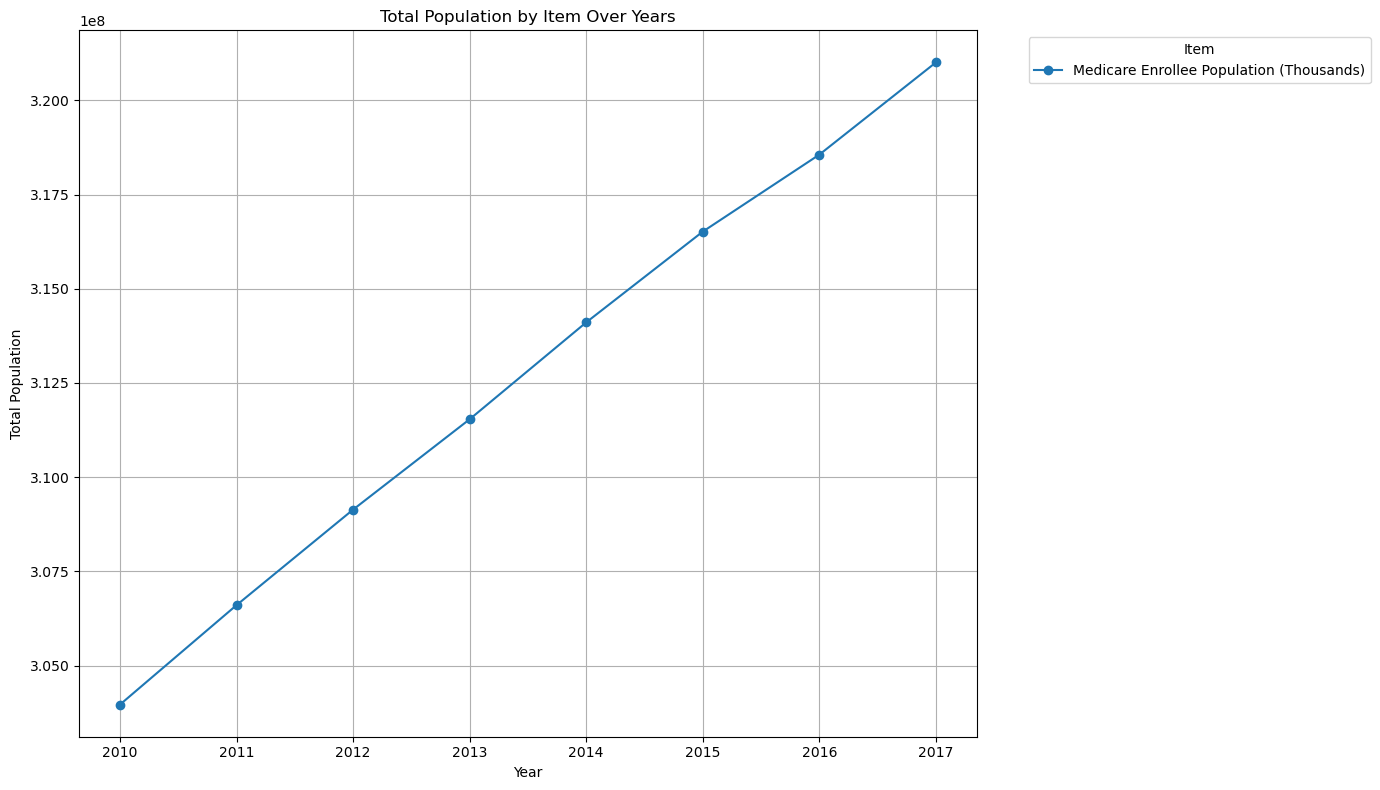

In [ ]:

grouped_data = organized_data.groupby(['Year', 'Item'])['Total Population'].sum().reset_index()

# Step 2: Create a line chart
plt.figure(figsize=(14, 8))

# Loop through each unique Item and plot
for item in grouped_data['Item'].unique():
    item_data = grouped_data[grouped_data['Item'] == item]
    plt.plot(item_data['Year'], item_data['Total Population'], marker='o', label=item)

# Step 3: Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population by Item Over Years')
plt.xticks(grouped_data['Year'].unique())  # Set x-ticks to be the unique years
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:
# Specify the year you want to print
specific_year = 2010  # Change this to the desired year

# Filter the DataFrame for the specified year
year_data = organized_data[organized_data['Year'] == specific_year]

# Print the Year
print(f"Year: {specific_year}")

# Print each State and Item for the specified year
for index, row in year_data.iterrows():
    print(f"  State: {row['State']}, Item: {row['Item']}")

Year: 2010
  State: Alabama, Item: Medicare Enrollee Population (Thousands)
  State: Alaska, Item: Medicare Enrollee Population (Thousands)
  State: Arizona, Item: Medicare Enrollee Population (Thousands)
  State: Arkansas, Item: Medicare Enrollee Population (Thousands)
  State: California, Item: Medicare Enrollee Population (Thousands)
  State: Colorado, Item: Medicare Enrollee Population (Thousands)
  State: Connecticut, Item: Medicare Enrollee Population (Thousands)
  State: Delaware, Item: Medicare Enrollee Population (Thousands)
  State: District of Columbia, Item: Medicare Enrollee Population (Thousands)
  State: Florida, Item: Medicare Enrollee Population (Thousands)
  State: Georgia, Item: Medicare Enrollee Population (Thousands)
  State: Hawaii, Item: Medicare Enrollee Population (Thousands)
  State: Idaho, Item: Medicare Enrollee Population (Thousands)
  State: Illinois, Item: Medicare Enrollee Population (Thousands)
  State: Indiana, Item: Medicare Enrollee Population (Thous

In [ ]:
#Medicare spending per state; comparison between two year 2010 and 2017

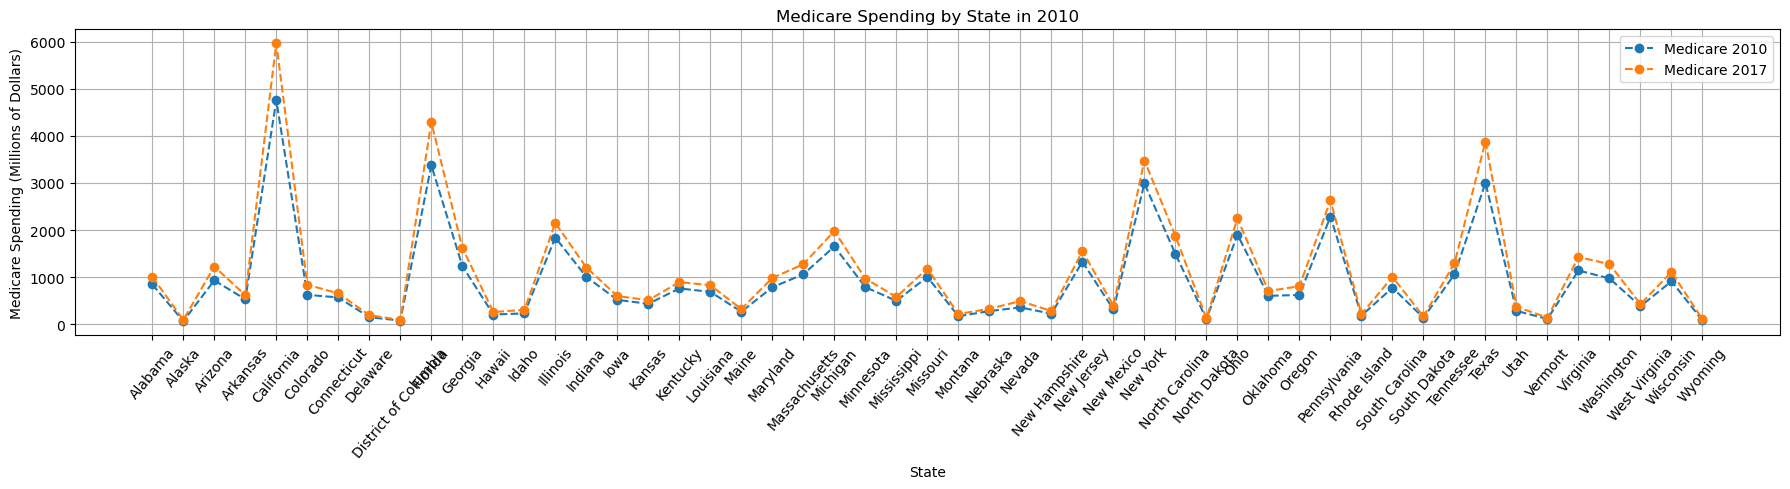

In [ ]:
# Specify the year you want to plot
specific_year = 2010  # Change this to your desired year

# Filter the merged data for the specific year
year_data = new_merged_data[new_merged_data['Year'] == specific_year]

# Set up the plot
plt.figure(figsize=(18, 5))

# Plotting Medicare spending per state for the specified year
plt.plot(year_data['State'], year_data['Medicare 2010'], marker='o', linestyle='--', label='Medicare 2010')

plt.plot(year_data['State'], year_data['Medicare 2017'], marker='o', linestyle='--', label='Medicare 2017')

# Add more lines for additional Medicare years if needed

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Medicare Spending (Millions of Dollars)')
plt.title(f'Medicare Spending by State in {specific_year}')

# Rotate x-axis labels for better readability
plt.xticks(rotation=50)

# Adding a legend
plt.legend()

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
Top ten states in Medicare expenditure in 2010 and 2017

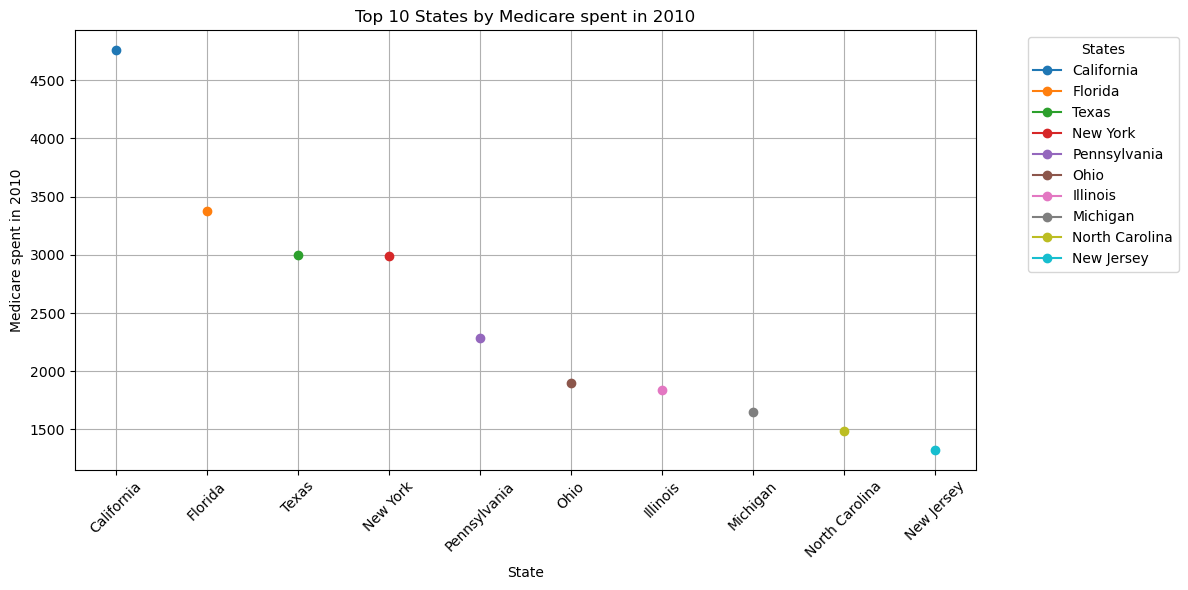

In [ ]:
specific_year = 2010

# Step 1: Filter the data for the specific year
year_data = new_merged_data[new_merged_data['Year'] == specific_year]

# Step 2: Get the top 10 states by a specific metric (e.g., 'Medicare 2010')
top_10_states = year_data.nlargest(10, 'Medicare 2010')

# Step 3: Plotting the data
plt.figure(figsize=(12, 6))

# Create a line plot for each state
for index, row in top_10_states.iterrows():
    plt.plot(row['State'], row['Medicare 2010'], marker='o', label=row['State'])

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Medicare spent in 2010')
plt.title(f'Top 10 States by Medicare spent in {specific_year}')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

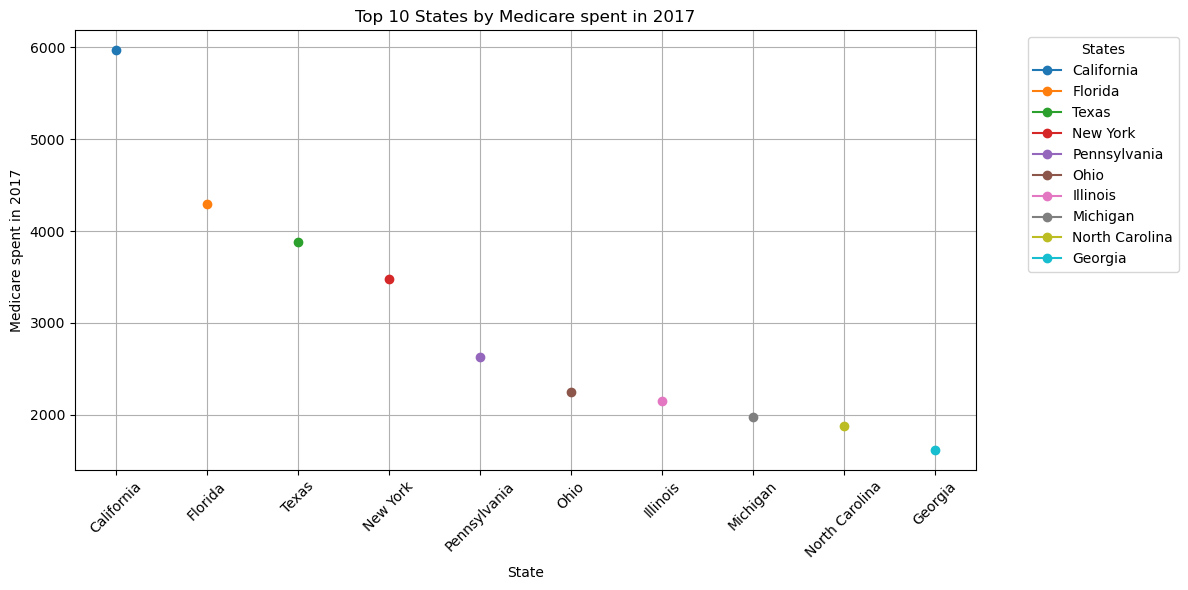

In [ ]:
specific_year = 2017

# Step 1: Filter the data for the specific year
year_data = new_merged_data[new_merged_data['Year'] == specific_year]

# Step 2: Get the top 10 states by a specific metric (e.g., 'Medicare 2010')
top_10_states = year_data.nlargest(10, 'Medicare 2017')

# Step 3: Plotting the data
plt.figure(figsize=(12, 6))

# Create a line plot for each state
for index, row in top_10_states.iterrows():
    plt.plot(row['State'], row['Medicare 2017'], marker='o', label=row['State'])

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Medicare spent in 2017')
plt.title(f'Top 10 States by Medicare spent in {specific_year}')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [ ]:
#Comparison total population in 2010 and 2017

In [ ]:
# Step 1: Filter the data for 2010 and 2017
data_2010 = new_merged_data[new_merged_data['Year'] == 2010]
data_2017 = new_merged_data[new_merged_data['Year'] == 2017]

# Step 2: Combine the data
# We will keep only the relevant columns for comparison
comparison_data = pd.concat([data_2010[['State', 'Total Population', 'Medicare 2010']],
                              data_2017[['State', 'Total Population', 'Medicare 2017']]], 
                             keys=['2010', '2017']).reset_index(level=0).rename(columns={'level_0': 'Year'})

# Optional: Resetting index for better visualization
comparison_data.reset_index(drop=True, inplace=True)

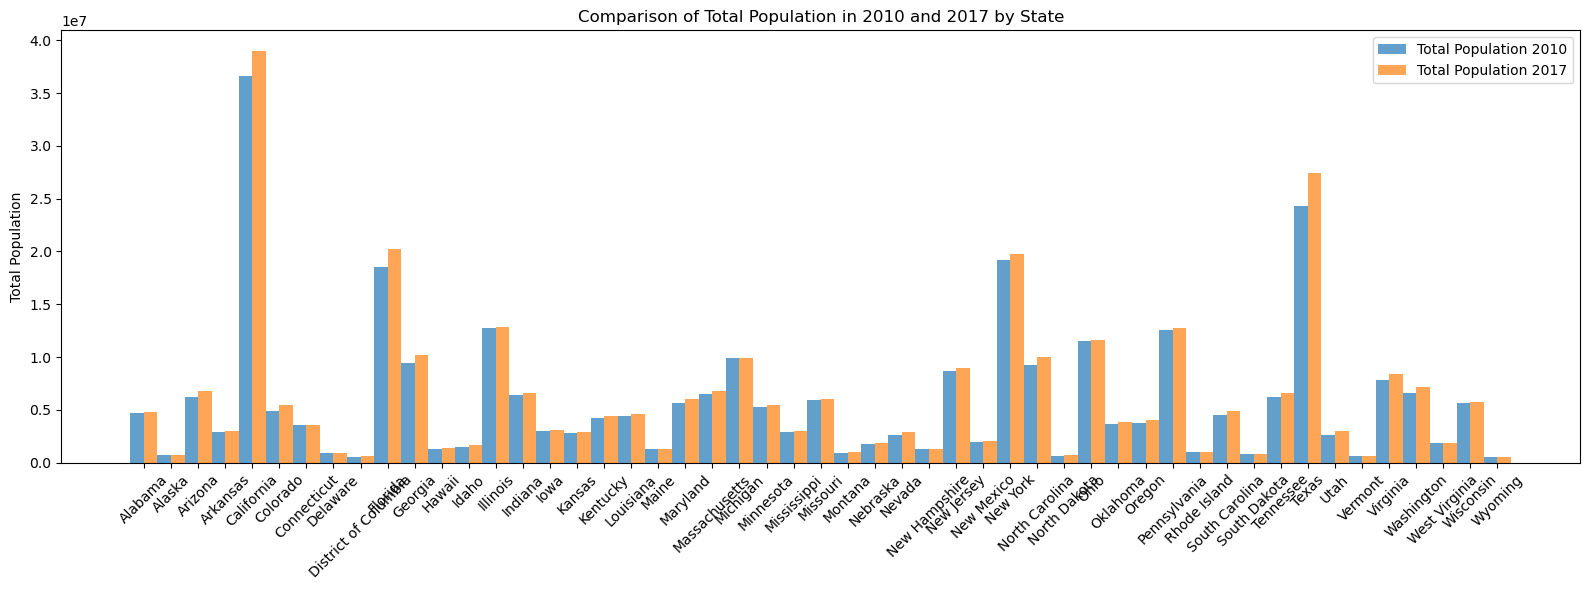

In [ ]:
states = comparison_data['State'].unique()
indices = np.arange(len(states))  # create a range for states

# Step 3: Plotting
fig, ax = plt.subplots(figsize=(16, 6))

# Plotting Total Population for 2010
width = 0.5  # Bar width
population_2010 = comparison_data[comparison_data['Year'] == '2010']['Total Population']
population_2017 = comparison_data[comparison_data['Year'] == '2017']['Total Population']

# Create bar plots
ax.bar(indices - width/2, population_2010, width, label='Total Population 2010', alpha=0.7)
ax.bar(indices + width/2, population_2017, width, label='Total Population 2017', alpha=0.7)

# Adding labels and title
ax.set_ylabel('Total Population')
ax.set_title('Comparison of Total Population in 2010 and 2017 by State')
ax.set_xticks(indices)  # Set x-ticks to indices
ax.set_xticklabels(states, rotation=45)  # Set the tick labels to states
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Relation betweent age and medicare between 2010 and 2017

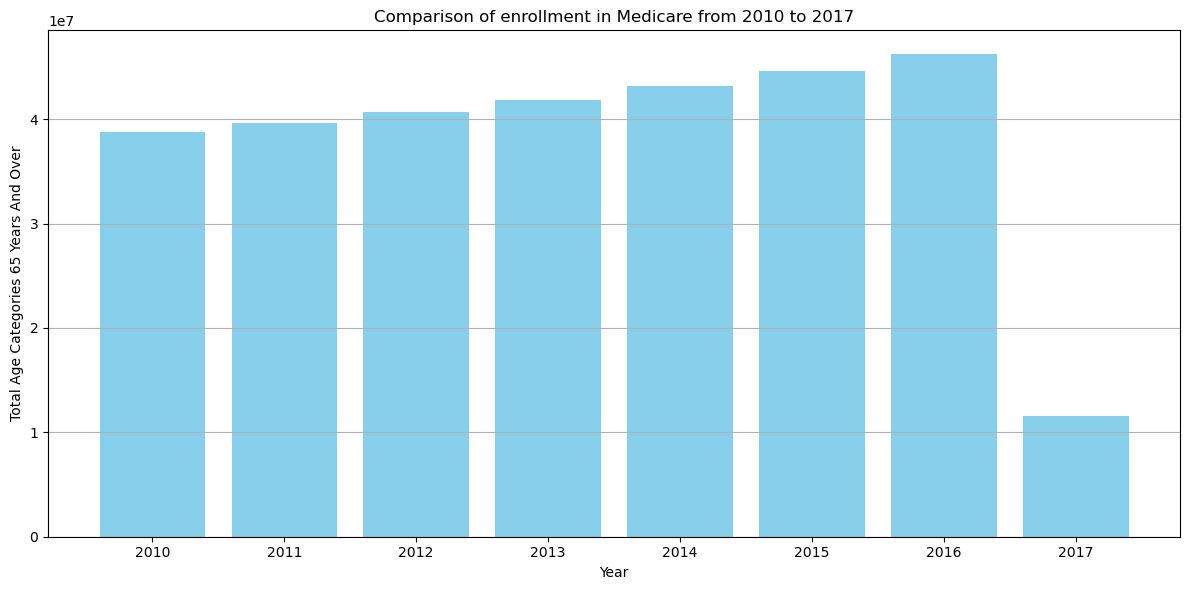

In [ ]:
age_65_over = new_merged_data.groupby('Year')['Age Categories 65 Years And Over'].sum().reset_index()

# Step 2: Plotting the data
plt.figure(figsize=(12, 6))

# Create bar plot
plt.bar(age_65_over['Year'], age_65_over['Age Categories 65 Years And Over'], color='skyblue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Age Categories 65 Years And Over')
plt.title('Comparison of enrollment in Medicare from 2010 to 2017')

# Optional: Add gridlines for better readability
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Group the data by Year and State, and then get the first unique Item description
grouped_data = organized_data.groupby(['Year', 'State', 'Age Categories 65 Years And Over'])['Item'].first().reset_index()

# Get unique years from the grouped data
unique_years = grouped_data['Year'].unique()

# Loop through each year
for year in unique_years:
    print(f"Year: {year}")
    
    # Filter the DataFrame for the current year
    year_data = grouped_data[grouped_data['Year'] == year]
    
    # Print each State and Item for the current year
    for index, row in year_data.iterrows():
        print(f"  State: {row['State']}, Item: {row['Item']}, Age 65 + spend in thousand: {row['Age Categories 65 Years And Over']}")
    
    # Optional: Add a separator for better readability between years
    print()  # New line for better separation between years

** Analysis of Medicare and Age ** :

# Comparison of Medicade and Poverty Rate

In [ ]:
#Select necessary columns and combine on State

** Analysis of Medicade and Poverty Rate ** :

# Comparison of Spending and Poverty Rate

# Import Cleaned Data

In [ ]:
# Import spending CSVs: CMS Data
CaidAgg_df = pd.read_csv("SpendingData/MEDICAID_AGGREGATE20.CSV")
CaidEnroll_df = pd.read_csv("SpendingData/MEDICAID_ENROLLMENT20.CSV")
CaidPerEnroll_df = pd.read_csv("SpendingData/MEDICAID_PER_ENROLLEE20.CSV")
CareAgg_df = pd.read_csv("SpendingData/MEDICARE_AGGREGATE20.CSV")
CareEnroll_df = pd.read_csv("SpendingData/MEDICARE_ENROLLMENT20.CSV")
CarePerEnroll_df = pd.read_csv("SpendingData/MEDICARE_PER_ENROLLEE20.CSV")
PHIAgg_df = pd.read_csv("SpendingData/PHI_AGGREGATE20.CSV")
PHIEnroll_df = pd.read_csv("SpendingData/PHI_ENROLLMENT20.CSV")
PHIPerEnroll_df = pd.read_csv("SpendingData/PHI_PER_ENROLLEE20.CSV")
USPop_df = pd.read_csv("SpendingData/US_POPULATION20.CSV")
us_per_cap_df = pd.read_csv("SpendingData/US_PER_CAPITA20.CSV")

# Import population CSVs: Census Data
Age_Sex_df = pd.read_csv("CensusData/AgeAndSex.csv")
Income_df = pd.read_csv("CensusData/Income.csv")

#Trim spending CSVs into relavent time period (2010-2020)
CaidAgg_df = CaidAgg_df.dropna(how = 'any')
CaidEnroll_df = CaidEnroll_df.dropna(how = 'any')
CaidPerEnroll_df = CaidPerEnroll_df.dropna(how = 'any')
CareAgg_df = CareAgg_df.dropna(how = 'any')
CareEnroll_df = CareEnroll_df.dropna(how = 'any')
CarePerEnroll_df = CarePerEnroll_df.dropna(how = 'any')
PHIAgg_df = PHIAgg_df.dropna(how = 'any')
PHIEnroll_df = PHIEnroll_df.dropna(how = 'any')
PHIPerEnroll_df = PHIPerEnroll_df.dropna(how = 'any')
USPop_df = USPop_df.dropna(how = 'any')

#Find wanted columns for the spending CSVs
CSVCols = ["Y"+str(x) for x in range(2010,2018)]
CSVCols.insert(0,'State_Name')
CSVCols.append('Code')
CSVCols.append('Item')
TCaidAgg_df = CaidAgg_df[CSVCols]
TCaidEnroll_df = CaidEnroll_df[CSVCols]
TCaidPerEnroll_df = CaidPerEnroll_df[CSVCols]
TCareAgg_df = CareAgg_df[CSVCols]
TCareEnroll_df = CareEnroll_df[CSVCols]
TCarePerEnroll_df = CarePerEnroll_df[CSVCols]
TPHIAgg_df = PHIAgg_df[CSVCols]
TPHIEnroll_df = PHIEnroll_df[CSVCols]
TPHIPerEnroll_df = PHIPerEnroll_df[CSVCols]
USPop_df = USPop_df[CSVCols]
us_per_cap_df = us_per_cap_df[CSVCols]
TCaidAgg_df.to_csv("CleanedData/MedicadeAggregate.csv",index = False,header = True)
TCareAgg_df.to_csv("CleanedData/MedicareAggregate.csv",index = False,header = True)
TPHIAgg_df.to_csv("CleanedData/PHIAggregate.csv",index = False,header = True)
TCaidEnroll_df.to_csv("CleanedData/MedicadeEnroll.csv",index = False,header = True)
TCaidPerEnroll_df.to_csv("CleanedData/MedicadePerEnroll.csv",index = False,header = True)
TCareEnroll_df.to_csv("CleanedData/MedicareEnroll.csv",index = False,header = True)
TCarePerEnroll_df.to_csv("CleanedData/MedicarePerEnroll.csv",index = False,header = True)
TPHIEnroll_df.to_csv("CleanedData/PHIEnroll.csv",index = False,header = True)
TPHIPerEnroll_df.to_csv("CleanedData/PHIPerEnroll.csv",index = False,header = True)
USPop_df.to_csv("CleanedData/USPop.csv")

In [ ]:
# Check dataframe example to make sure data needed is included, for the timeframes required
TCaidAgg_df.columns

Index(['State_Name', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015',
       'Y2016', 'Y2017', 'Code', 'Item'],
      dtype='object')

# Medicaid Spend Analysis

In [ ]:
# Split data into groups based on State and Code, by Year
TCaidAgg_df_grouped = TCaidAgg_df.groupby(['State_Name', 'Code'])
sum_2010_2017_caid = TCaidAgg_df_grouped[["Y2010", "Y2011","Y2012","Y2013","Y2014","Y2015","Y2016","Y2017"]].sum()
sum_2010_2017_caid.head()

# Sum each code, by year, across all states
TCaidAgg_df_groupedbycode = TCaidAgg_df.groupby(['Code']).sum()

# Create DataFrame
TCaidAgg_df_groupedbycode_df = pd.DataFrame(TCaidAgg_df_groupedbycode)
TCaidAgg_df_groupedbycode_df

Y2010   Y2011   Y2012   Y2013   Y2014   Y2015   Y2016   Y2017
Code                                                                
1     365708  373685  388256  405663  446921  484507  503379  516068
2     142173  144348  150635  157074  171742  186098  190072  192230
3      43403   45323   47322   51895   64471   70071   73065   74914
4       4961    4788    4768    5068    5931    6776    7172    7166
5       8391    8455    8492    8719    9771   11231   11888   12219
6      25418   26533   27046   27800   29111   31462   32656   33585
7      20425   20780   21050   21163   25265   27681   29325   29406
8       4919    5102    5332    5689    6538    7298    7630    7795
9      46336   47648   47726   48107   49243   49755   50672   51314
10     69688   70705   75874   80131   84803   94075  100797  107290

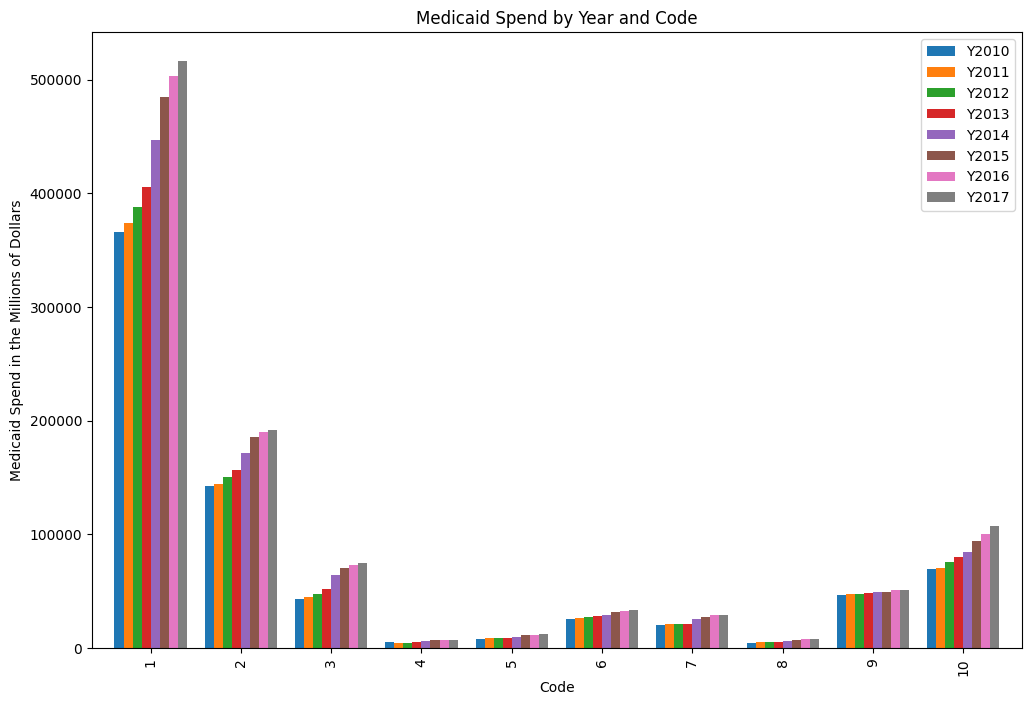

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot bar graph by year and code
medicaid_year_bycode = TCaidAgg_df_groupedbycode.plot(kind='bar', figsize=(12,8), width=0.8, title='Medicaid Spend by Year and Code')
medicaid_year_bycode.set_ylabel("Medicaid Spend in the Millions of Dollars")
plt.show()
plt.tight_layout()

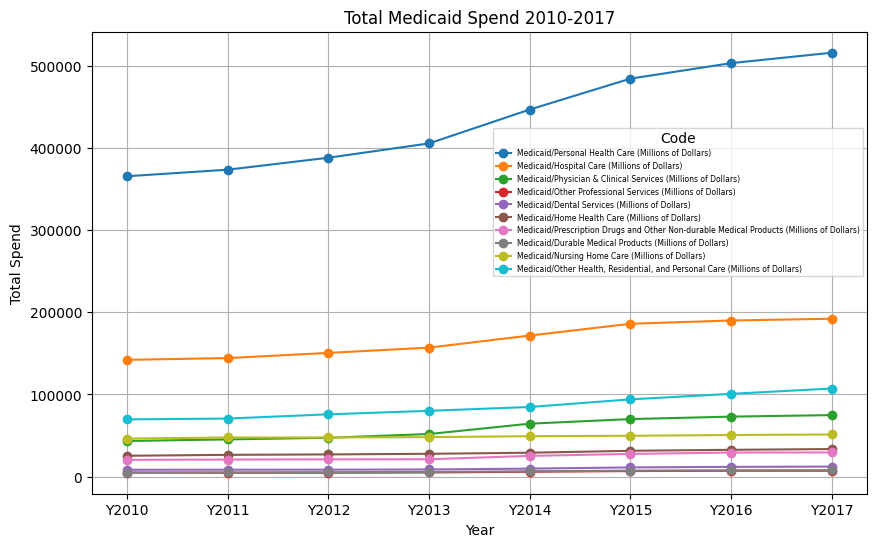

In [ ]:
# Show US Per Capita spend in line graph to easily see by code
TCaidAgg_df_grouped = TCaidAgg_df.groupby('Code').sum()

# Plot data on graph
years = ['Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017']
plt.figure(figsize=(10,6))

# After seeing the legened did not connect the code # to the description, connecting those fields so it's clear on the graph what each code number represents in the legend
code_item_description = TCaidAgg_df[['Code', 'Item']].drop_duplicates().set_index('Code')['Item']

# Create For Loop to loop through all the codes and plot totals by year
for code in TCaidAgg_df_grouped.index:
    plt.plot(years, TCaidAgg_df_grouped.loc[code, years], marker='o', label=code_item_description[code])

# Label graph and position legend so it doesn't overlap the data on the graph
plt.title('Total Medicaid Spend 2010-2017')
plt.xlabel('Year')
plt.ylabel('Total Spend')
plt.legend(title='Code', fontsize=5.5, loc='upper right', bbox_to_anchor=(1,.8))
plt.grid(True)
plt.savefig(f"Graphs/MedicaidSpendbyCode_AllYears")
plt.show()

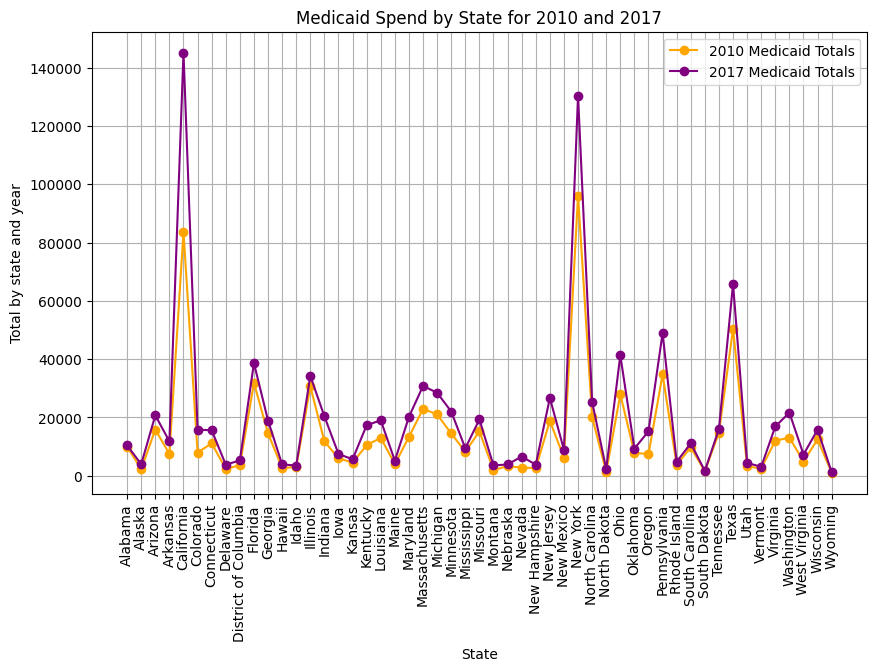

In [ ]:
# Graph and look at data at the state level, for an individual year
# GRAPH 1: Split data into groups based on State and Code, by year
TCaidAgg_df_grouped = TCaidAgg_df.groupby(['State_Name', 'Code'])
sum_2010_caid = TCaidAgg_df_grouped[["Y2010"]].sum()

# Turn into a dataframe
sum_2010_caid_df = pd.DataFrame(sum_2010_caid)

# Graph by state and code
sum_2010_caid_df = sum_2010_caid_df.groupby('State_Name').sum()
sum_2010_caid_df.sort_values(by='State_Name', ascending=True)
#sum_2010_caid_df['Y2010'].plot(kind='bar')

# GRAPH 1: Add title, label axis, and show graph
#plt.title('Medicaid Total Service Spend by state in 2010')
#plt.xlabel('State Name')
#plt.ylabel('Y2010')
#plt.show()

# GRAPH 2: Add a 2017 graph following the same method above
TCaidAgg_df_grouped = TCaidAgg_df.groupby(['State_Name', 'Code'])
sum_2017_caid = TCaidAgg_df_grouped[["Y2017"]].sum()

# Turn into a dataframe
sum_2017_caid_df = pd.DataFrame(sum_2017_caid)

# Graph by state and code
sum_2017_caid_df = sum_2017_caid_df.groupby('State_Name').sum()
sum_2017_caid_df.sort_values(by='State_Name', ascending=True)
#sum_2017_caid_df['Y2017'].plot(kind='bar')

# Add title, label axis, and show graph
#plt.title('Medicaid Total Service Spend by state in 2017')
#plt.xlabel('State Name')
#plt.ylabel('Y2017')
#plt.show()

# GRAPH 3: Combine graphs above in 1 view
plt.figure(figsize=(10,6))
plt.plot(sum_2010_caid_df['Y2010'], marker='o', label='2010 Medicaid Totals', color='orange')
plt.plot(sum_2017_caid_df['Y2017'], marker='o', label='2017 Medicaid Totals', color='purple')

# Rotate x-axis ticks to 90 degrees so you can read each state
plt.xticks(rotation=90)

# Add legend so you know which data set is 2010 vs. 2017
plt.legend()

# Add title, axis labels, add grid, and show
plt.title('Medicaid Spend by State for 2010 and 2017')
plt.xlabel('State')
plt.ylabel('Total by state and year')
plt.grid(True)
plt.tight_layout
plt.savefig(f"Graphs/MedicaidSpendbyState_2010&2017")
plt.show()


In [ ]:
# Show Population dataframe to see what columns to divide by

# Align indexes across dataframes to be State Name
#USPop_df.set_index("State_Name", inplace=True)
USPop_df.head()

Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  Y2017  Code  \
State_Name                                                                 
Alabama      4786   4800   4817   4832   4844   4855   4867   4878    11   
Alaska        714    722    731    738    737    738    743    741    11   
Arizona      6407   6473   6556   6635   6733   6833   6945   7048    11   
Arkansas     2922   2941   2953   2960   2969   2980   2992   3004    11   
California  37320  37636  37945  38254  38587  38904  39149  39338    11   

                              Item  
State_Name                          
Alabama     Population (Thousands)  
Alaska      Population (Thousands)  
Arizona     Population (Thousands)  
Arkansas    Population (Thousands)  
California  Population (Thousands)

In [ ]:
# Show Total Medicaid Spend dataframe to see what columns to divide by
sum_2010_caid_df.head()

Y2010
State_Name       
Alabama     10007
Alaska       2202
Arizona     15832
Arkansas     7464
California  83594

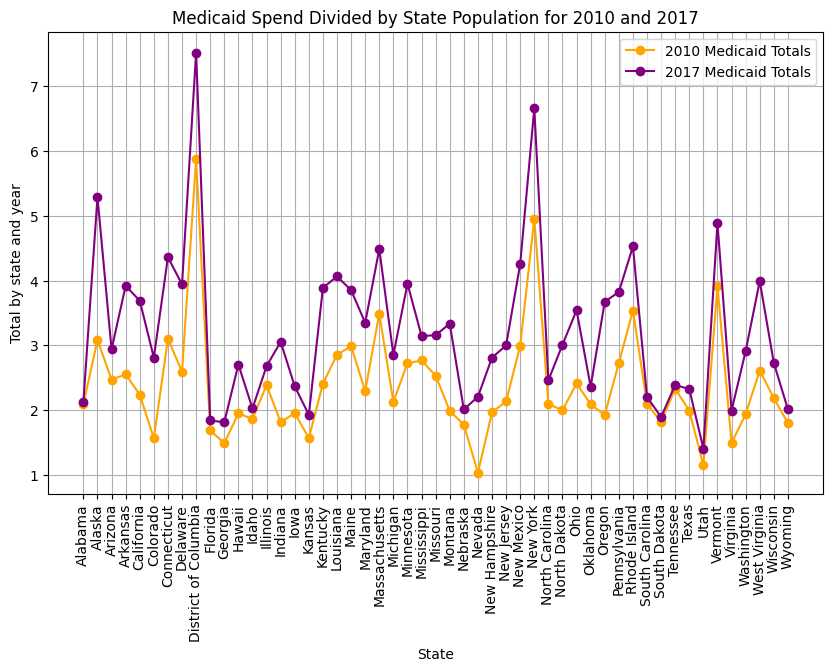

In [ ]:
# Divide by US population by state in a given year to make sure we're comparing apples to apples

# Align indexes
#sum_2010_caid_df.set_index("State_Name", inplace=True)
#sum_2017_caid_df.set_index("State_Name", inplace=True)
#USPop_df.set_index("State_Name", inplace=True)

# Divide total spend by population for 2010
spend_div_pop_2010_caid = sum_2010_caid_df['Y2010'] / USPop_df['Y2010']
spend_div_pop_2010_caid_df = pd.DataFrame(spend_div_pop_2010_caid)

# Divide total spend by population for 2017
spend_div_pop_2017_caid = sum_2017_caid_df['Y2017'] / USPop_df['Y2017']
spend_div_pop_2017_caid_df = pd.DataFrame(spend_div_pop_2017_caid)


# GRAPH 4: Combine graphs above in 1 view and divide by population
plt.figure(figsize=(10,6))
plt.plot(spend_div_pop_2010_caid_df['Y2010'], marker='o', label='2010 Medicaid Totals', color='orange')
plt.plot(spend_div_pop_2017_caid_df['Y2017'], marker='o', label='2017 Medicaid Totals', color='purple')

# Rotate x-axis ticks to 90 degrees so you can read each state
plt.xticks(rotation=90)

# Add legend so you know which data set is 2010 vs. 2017
plt.legend()

# Add title, axis labels, add grid, and show
plt.title('Medicaid Spend Divided by State Population for 2010 and 2017')
plt.xlabel('State')
plt.ylabel('Total by state and year')
plt.grid(True)
plt.tight_layout
plt.savefig(f"Graphs/MedicaidSpendbyStatePop_2010&2017")
plt.show()



# Medicare Spend Analysis

In [ ]:
# Split data into groups based on State and Code, by Year
TCareAgg_df_grouped = TCareAgg_df.groupby(['State_Name', 'Code'])
sum_2010_2017_care = TCareAgg_df_grouped[["Y2010", "Y2011","Y2012","Y2013","Y2014","Y2015","Y2016","Y2017"]].sum()
sum_2010_2017_care.head()

# Sum each code, by year, across all states
TCareAgg_df_groupedbycode = TCareAgg_df.groupby(['Code']).sum()

# Create DataFrame
TCareAgg_df_groupedbycode_df = pd.DataFrame(TCareAgg_df_groupedbycode)
TCareAgg_df_groupedbycode_df

Y2010   Y2011   Y2012   Y2013   Y2014   Y2015   Y2016   Y2017
Code                                                                
1     488818  511846  533640  553569  579473  606245  628876  659001
2     220761  227734  237964  246273  253531  261798  273932  286480
3     118153  124870  131250  135659  142325  149332  154493  164049
4      14066   15128   16248   17453   18716   20221   21242   23222
5        241     293     365     478     407     461     509     865
6      31718   32205   33537   33669   34297   35850   37169   38451
7      59302   63393   67214   72470   81733   88634   92004   95490
8       7506    7530    8087    7804    7778    7950    7633    8099
9      32287   35741   33884   34618   35498   36965   37004   37405
10      4774    4950    5091    5145    5186    5040    4885    4931

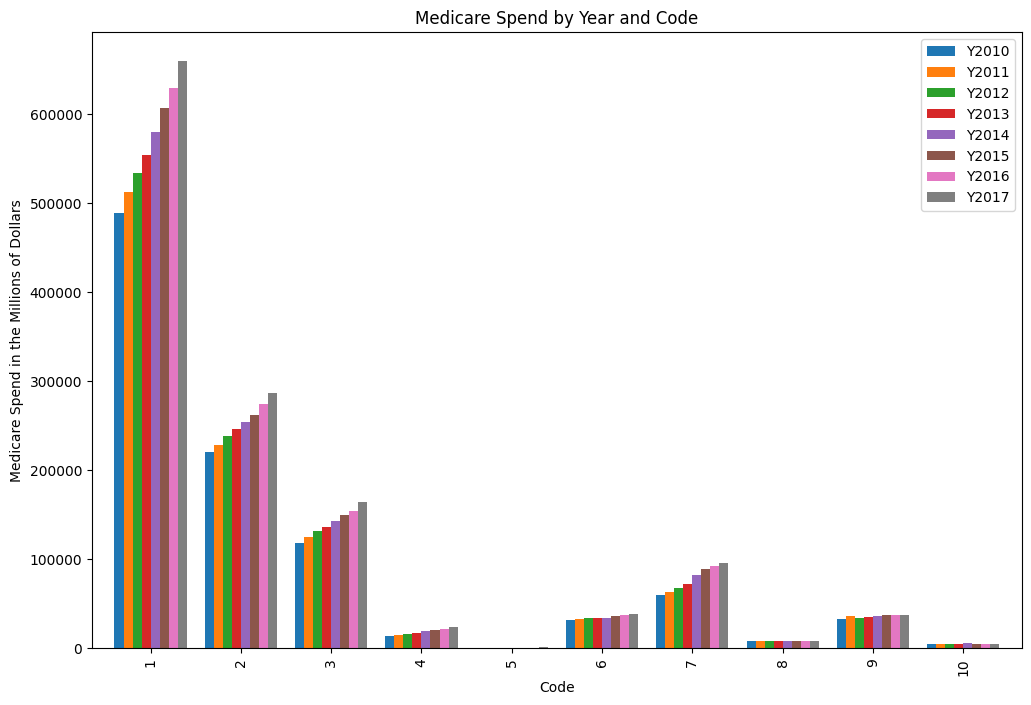

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot bar graph by year and code
medicare_year_bycode = TCareAgg_df_groupedbycode.plot(kind='bar', figsize=(12,8), width=0.8, title='Medicare Spend by Year and Code')
medicare_year_bycode.set_ylabel("Medicare Spend in the Millions of Dollars")
plt.show()
plt.tight_layout()

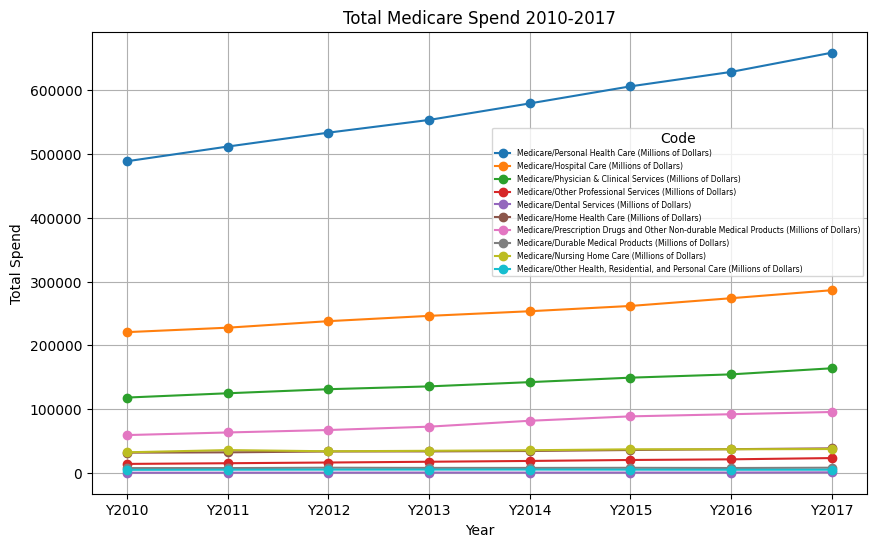

In [ ]:
# Show US Per Capita spend in line graph to easily see by code
TCareAgg_df_grouped = TCareAgg_df.groupby('Code').sum()

# Plot data on graph
years = ['Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017']
plt.figure(figsize=(10,6))

# After seeing the legened did not connect the code # to the description, connecting those fields so it's clear on the graph what each code number represents in the legend
code_item_description = TCareAgg_df[['Code', 'Item']].drop_duplicates().set_index('Code')['Item']

# Create For Loop to loop through all the codes and plot totals by year
for code in TCareAgg_df_grouped.index:
    plt.plot(years, TCareAgg_df_grouped.loc[code, years], marker='o', label=code_item_description[code])

# Label graph and position legend so it doesn't overlap the data on the graph
plt.title('Total Medicare Spend 2010-2017')
plt.xlabel('Year')
plt.ylabel('Total Spend')
plt.legend(title='Code', fontsize=5.5, loc='upper right', bbox_to_anchor=(1,.8))
plt.grid(True)
plt.savefig(f"Graphs/MedicareSpendbyCode_AllYears")
plt.show()

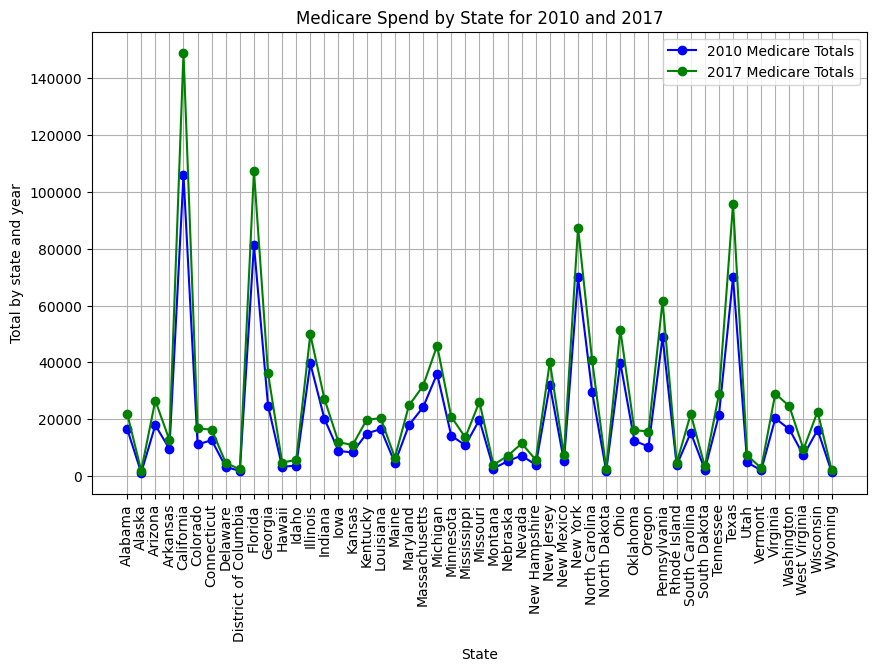

In [ ]:
# Graph and look at data at the state level, for an individual year
# GRAPH 1: Split data into groups based on State and Code, by year
TCareAgg_df_grouped = TCareAgg_df.groupby(['State_Name', 'Code'])
sum_2010_care = TCareAgg_df_grouped[["Y2010"]].sum()

# Turn into a dataframe
sum_2010_care_df = pd.DataFrame(sum_2010_care)

# Graph by state and code
sum_2010_care_df = sum_2010_care_df.groupby('State_Name').sum()
sum_2010_care_df.sort_values(by='State_Name', ascending=True)
#sum_2010_care_df['Y2010'].plot(kind='bar')

# GRAPH 1: Add title, label axis, and show graph
#plt.title('Medicare Total Service Spend by state in 2010')
#plt.xlabel('State Name')
#plt.ylabel('Y2010')
#plt.show()

# GRAPH 2: Add a 2017 graph following the same method above
TCareAgg_df_grouped = TCareAgg_df.groupby(['State_Name', 'Code'])
sum_2017_care = TCareAgg_df_grouped[["Y2017"]].sum()

# Turn into a dataframe
sum_2017_care_df = pd.DataFrame(sum_2017_care)

# Graph by state and code
sum_2017_care_df = sum_2017_care_df.groupby('State_Name').sum()
sum_2017_care_df.sort_values(by='State_Name', ascending=True)
#sum_2017_care_df['Y2017'].plot(kind='bar')

# Add title, label axis, and show graph
#plt.title('Medicare Total Service Spend by state in 2017')
#plt.xlabel('State Name')
#plt.ylabel('Y2017')
#plt.show()

# GRAPH 3: Combine graphs above in 1 view
plt.figure(figsize=(10,6))
plt.plot(sum_2010_care_df['Y2010'], marker='o', label='2010 Medicare Totals', color='blue')
plt.plot(sum_2017_care_df['Y2017'], marker='o', label='2017 Medicare Totals', color='green')

# Rotate x-axis ticks to 90 degrees so you can read each state
plt.xticks(rotation=90)

# Add legend so you know which data set is 2010 vs. 2017
plt.legend()

# Add title, axis labels, add grid, and show
plt.title('Medicare Spend by State for 2010 and 2017')
plt.xlabel('State')
plt.ylabel('Total by state and year')
plt.grid(True)
plt.tight_layout
plt.savefig(f"Graphs/MedicareSpendbyState_2010&2017")
plt.show()


In [ ]:
# Show calculation dividing Medicare state totals by state population in a given year

spend_div_pop_2010_care = sum_2010_care_df['Y2010'] / USPop_df['Y2010']
spend_div_pop_2010_care_df = pd.DataFrame(spend_div_pop_2010_care)
spend_div_pop_2010_care_df.head()

Y2010
State_Name          
Alabama     3.468868
Alaska      1.575630
Arizona     2.790698
Arkansas    3.251198
California  2.840675

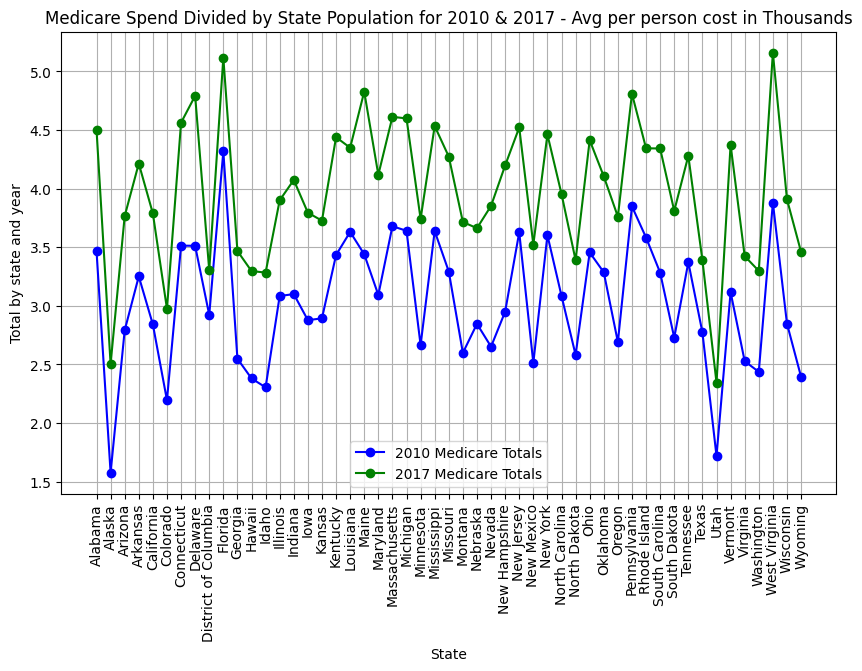

In [ ]:
# Divide by US population by state in a given year to make sure we're comparing apples to apples

# Divide total spend by population for 2010
spend_div_pop_2010_care = sum_2010_care_df['Y2010'] / USPop_df['Y2010']
spend_div_pop_2010_care_df = pd.DataFrame(spend_div_pop_2010_care)

# Divide total spend by population for 2017
spend_div_pop_2017_care = sum_2017_care_df['Y2017'] / USPop_df['Y2017']
spend_div_pop_2017_care_df = pd.DataFrame(spend_div_pop_2017_care)


# GRAPH 4: Combine graphs above in 1 view and divide by population
plt.figure(figsize=(10,6))
plt.plot(spend_div_pop_2010_care_df['Y2010'], marker='o', label='2010 Medicare Totals', color='blue')
plt.plot(spend_div_pop_2017_care_df['Y2017'], marker='o', label='2017 Medicare Totals', color='green')

# Rotate x-axis ticks to 90 degrees so you can read each state
plt.xticks(rotation=90)

# Add legend so you know which data set is 2010 vs. 2017
plt.legend()

# Note population and totals in thousands; the below shows the avg per person cost
# Add title, axis labels, add grid, and show
plt.title('Medicare Spend Divided by State Population for 2010 & 2017 - Avg per person cost in Thousands')
plt.xlabel('State')
plt.ylabel('Total by state and year')
plt.grid(True)
plt.tight_layout
plt.savefig(f"Graphs/MedicareSpendbyStatePop_2010&2017")
plt.show()


# US Per Capita Spend Analysis

In [ ]:
# Split data into groups based on State and Code, by Year
us_per_cap_df_grouped = us_per_cap_df.groupby(['State_Name', 'Code'])
sum_2010_2017_us_cap = us_per_cap_df_grouped[["Y2010", "Y2011","Y2012","Y2013","Y2014","Y2015","Y2016","Y2017"]].sum()
sum_2010_2017_us_cap.head()

# Sum each code, by year, across all states
us_per_cap_df_groupedbycode = us_per_cap_df.groupby(['Code']).sum()

# Create DataFrame
us_per_cap_df_groupedbycode_df = pd.DataFrame(us_per_cap_df_groupedbycode)
us_per_cap_df_groupedbycode_df

Y2010   Y2011   Y2012   Y2013   Y2014   Y2015   Y2016   Y2017
Code                                                                
1     434920  446961  461782  470383  490806  514867  534015  551765
2     166920  171218  178325  183007  188965  197624  205324  213375
3      98277  102312  105746  106997  111483  117629  123909  129455
4      13839   14444   15183   15470   16293   17243   18138   18934
5      21209   21526   21794   22110   22703   23611   24837   25433
6      12138   12899   13486   13908   14533   15276   15906   16773
7      58664   59622   60428   60773   66367   70322   70289   70608
8       7854    7938    8414    8674    8918    9241    9516    9655
9      28110   28756   29033   29131   29609   30176   31148   31227
10     27904   28245   29371   30306   31928   33757   34942   36300

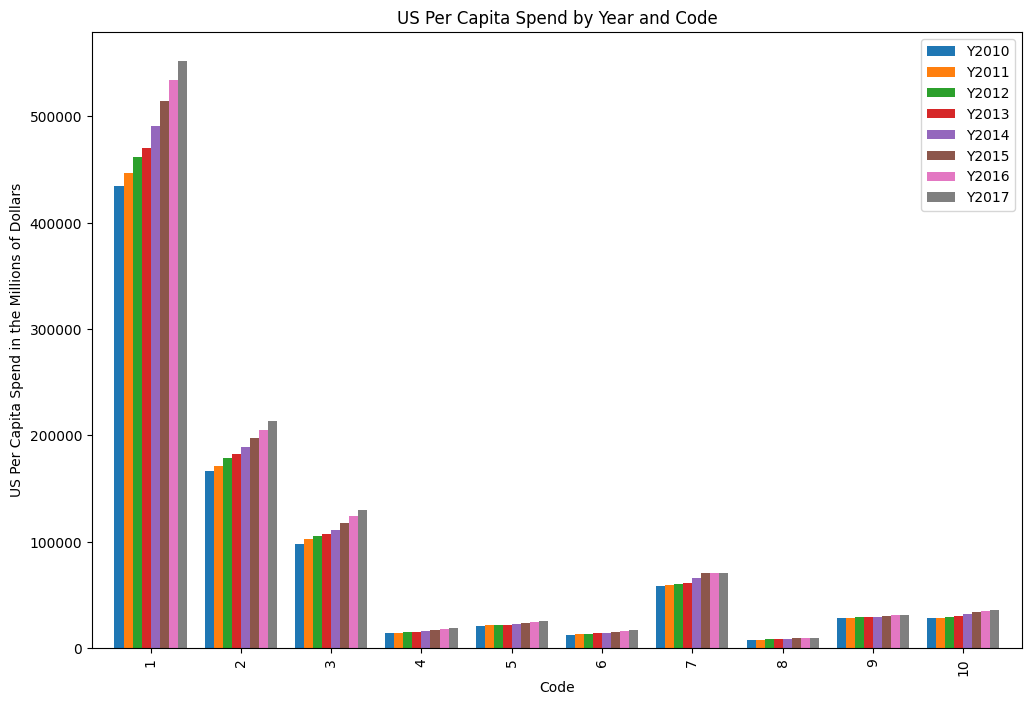

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot bar graph by year and code
us_per_cap_year_bycode = us_per_cap_df_groupedbycode.plot(kind='bar', figsize=(12,8), width=0.8, title='US Per Capita Spend by Year and Code')
us_per_cap_year_bycode.set_ylabel("US Per Capita Spend in the Millions of Dollars")
plt.show()
plt.tight_layout()

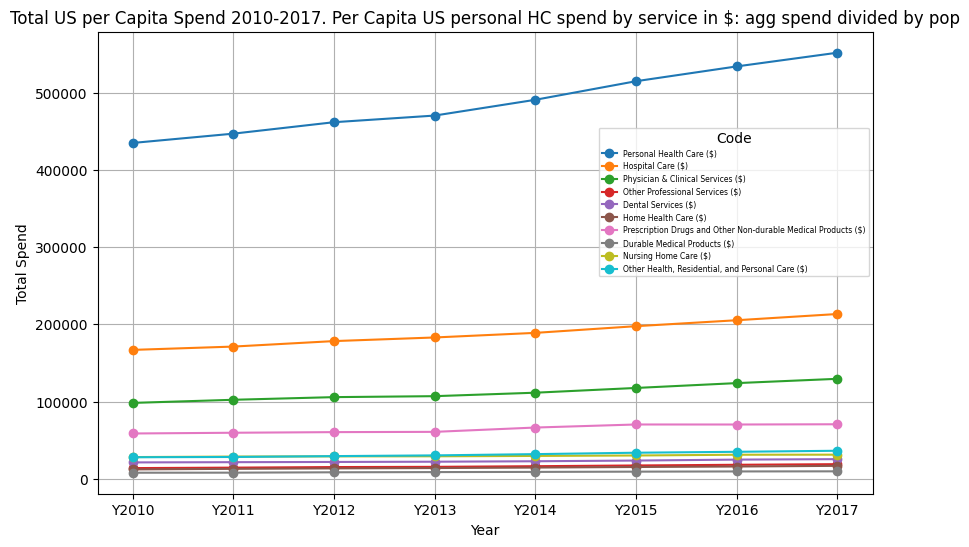

In [ ]:
# Show US Per Capita spend in line graph to easily see by code
us_per_cap_df_grouped = us_per_cap_df.groupby('Code').sum()

# Plot data on graph
years = ['Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017']
plt.figure(figsize=(10,6))

# After seeing the legened did not connect the code # to the description, connecting those fields so it's clear on the graph what each code number represents in the legend
code_item_description = us_per_cap_df[['Code', 'Item']].drop_duplicates().set_index('Code')['Item']

# Create For Loop to loop through all the codes and plot totals by year
for code in us_per_cap_df_grouped.index:
    plt.plot(years, us_per_cap_df_grouped.loc[code, years], marker='o', label=code_item_description[code])

# Label graph and position legend so it doesn't overlap the data on the graph
plt.title('Total US per Capita Spend 2010-2017. Per Capita US personal HC spend by service in $: agg spend divided by pop')
plt.xlabel('Year')
plt.ylabel('Total Spend')
plt.legend(title='Code', fontsize=5.5, loc='upper right', bbox_to_anchor=(1,.8))
plt.grid(True)
plt.savefig(f"Graphs/USPerCapSpendbyCode_AllYears")
plt.show()

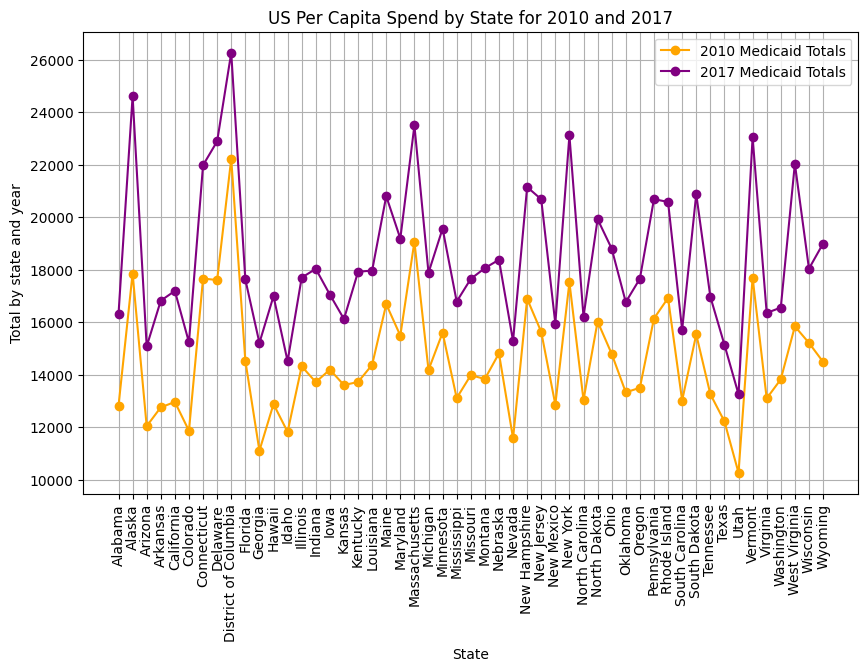

In [ ]:
# Graph and look at data at the state level, for an individual year
# GRAPH 1: Split data into groups based on State and Code, by year
us_per_cap_df_grouped = us_per_cap_df.groupby(['State_Name', 'Code'])
sum_2010_us_per_cap = us_per_cap_df_grouped[["Y2010"]].sum()

# Turn into a dataframe
sum_2010_us_per_cap_df = pd.DataFrame(sum_2010_us_per_cap)

# Graph by state and code
sum_2010_us_per_cap_df = sum_2010_us_per_cap.groupby('State_Name').sum()
sum_2010_us_per_cap_df.sort_values(by='State_Name', ascending=True)
#sum_2010_us_per_cap_df['Y2010'].plot(kind='bar')

# GRAPH 1: Add title, label axis, and show graph
#plt.title('US Per Capita Total Service Spend by state in 2010')
#plt.xlabel('State Name')
#plt.ylabel('Y2010')
#plt.show()

# GRAPH 2: Add a 2017 graph following the same method above
us_per_cap_df_grouped = us_per_cap_df.groupby(['State_Name', 'Code'])
sum_2017_us_per_cap = us_per_cap_df_grouped[["Y2017"]].sum()

# Turn into a dataframe
sum_2017_us_per_cap_df = pd.DataFrame(sum_2017_us_per_cap)

# Graph by state and code
sum_2017_us_per_cap_df = sum_2017_us_per_cap_df.groupby('State_Name').sum()
sum_2017_us_per_cap_df.sort_values(by='State_Name', ascending=True)
#sum_2017_us_per_cap_df['Y2017'].plot(kind='bar')

# Add title, label axis, and show graph
#plt.title('US Per Capita Total Service Spend by state in 2017')
#plt.xlabel('State Name')
#plt.ylabel('Y2017')
#plt.show()

# GRAPH 3: Combine graphs above in 1 view
plt.figure(figsize=(10,6))
plt.plot(sum_2010_us_per_cap_df['Y2010'], marker='o', label='2010 Medicaid Totals', color='orange')
plt.plot(sum_2017_us_per_cap_df['Y2017'], marker='o', label='2017 Medicaid Totals', color='purple')

# Rotate x-axis ticks to 90 degrees so you can read each state
plt.xticks(rotation=90)

# Add legend so you know which data set is 2010 vs. 2017
plt.legend()

# Add title, axis labels, add grid, and show
plt.title('US Per Capita Spend by State for 2010 and 2017')
plt.xlabel('State')
plt.ylabel('Total by state and year')
plt.grid(True)
plt.tight_layout
plt.savefig(f"Graphs/USPerCapSpendbyState_2010&2017")
plt.show()


# Private Healthcare Spending

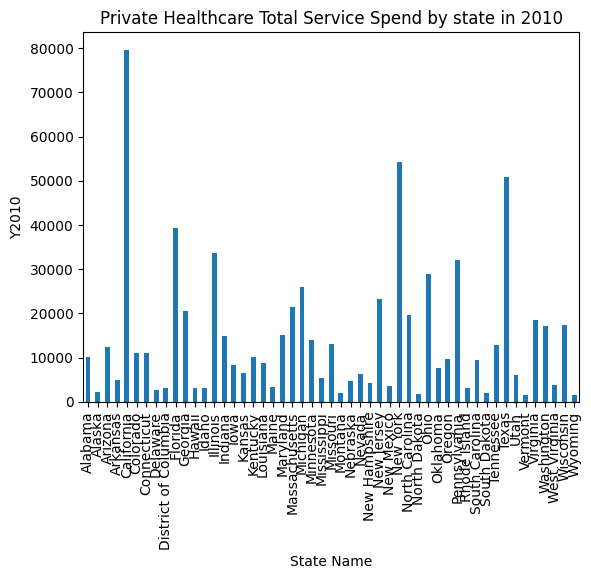

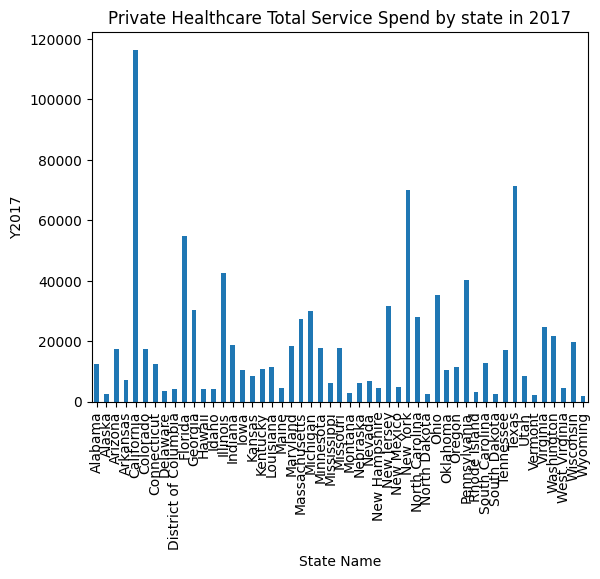

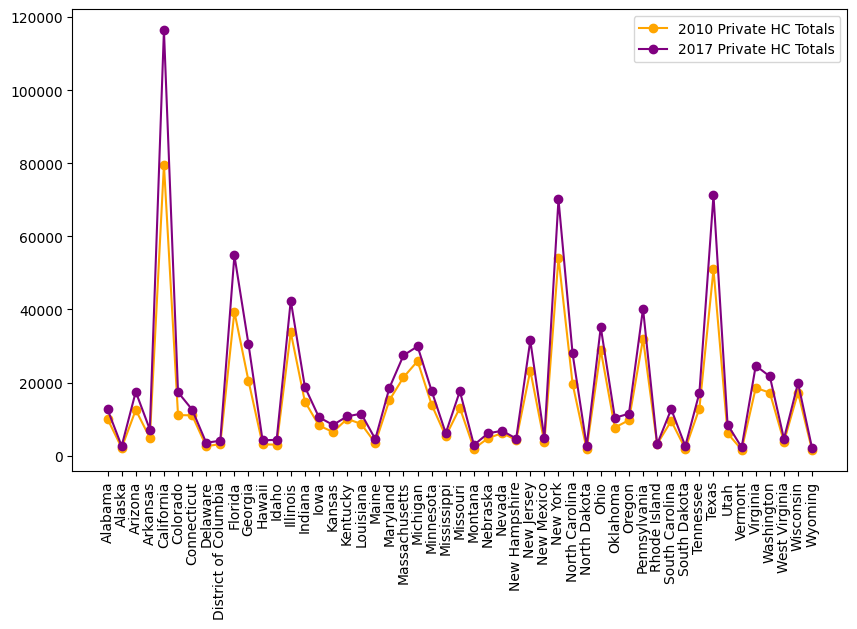

In [ ]:
# Graph and look at data at the state level, for an individual year
# GRAPH 1: Split data into groups based on State and Code, by year
TPHIAgg_df_grouped = TPHIAgg_df.groupby(['State_Name'])
sum_2010_phi = TPHIAgg_df_grouped[["Y2010"]].sum()

# Turn into a dataframe
sum_2010_phi_df = pd.DataFrame(sum_2010_phi)

# Graph by state and year
sum_2010_phi_df = sum_2010_phi_df.groupby('State_Name').sum()
sum_2010_phi_df.sort_values(by='State_Name', ascending=True)
sum_2010_phi_df['Y2010'].plot(kind='bar')

# GRAPH 1: Add title, label axis, and show graph
plt.title('Private Healthcare Total Service Spend by state in 2010')
plt.xlabel('State Name')
plt.ylabel('Y2010')
plt.show()

# GRAPH 2: Add a 2017 graph following the same method above
TPHIAgg_df_grouped = TPHIAgg_df.groupby(['State_Name'])
sum_2017_phi = TPHIAgg_df_grouped[["Y2017"]].sum()

# Turn into a dataframe
sum_2017_phi_df = pd.DataFrame(sum_2017_phi)

# Graph by state and code
sum_2017_phi_df = sum_2017_phi_df.groupby('State_Name').sum()
sum_2017_phi_df.sort_values(by='State_Name', ascending=True)
sum_2017_phi_df['Y2017'].plot(kind='bar')

# Add title, label axis, and show graph
plt.title('Private Healthcare Total Service Spend by state in 2017')
plt.xlabel('State Name')
plt.ylabel('Y2017')
plt.show()

# GRAPH 3: Combine graphs above in 1 view
plt.figure(figsize=(10,6))
plt.plot(sum_2010_phi_df['Y2010'], marker='o', label='2010 Private HC Totals', color='orange')
plt.plot(sum_2017_phi_df['Y2017'], marker='o', label='2017 Private HC Totals', color='purple')

# Rotate x-axis ticks to 90 degrees so you can read each state
plt.xticks(rotation=90)

# Add legend so you know which data set is 2010 vs. 2017
plt.legend()
plt.savefig(f"Graphs/USPrivateHCSpendbyState_2010&2017")


** Analysis of Spending and Poverty Rate ** :